# Amplitude and phase features on Spectral Taylor Diagram
author: Mabel Calim Costa

12/11/2019


In [2]:
import numpy as np
from numpy import ma
from matplotlib import pyplot as plt
import scipy.stats as stats
from IPython.display import display, Math, Latex
from numpy.random import rand
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%pylab inline


Populating the interactive namespace from numpy and matplotlib


In [3]:
def coherence(modelo1,modelo2):
         import pylab 
         from pylab import detrend_linear,detrend_mean
 
         n, X, Y, sxy, coer, sxx, syy = len(modelo1),np.fft.fft(modelo1), np.fft.fft(modelo2), [], [], [],[]
         # densidade espectral de potencia
         variance1 = np.var(modelo1)
         variance2 = np.var(modelo2)
         sxx = (X * np.conj(X))/n

         syy = (Y * np.conj(Y))/n
         sxy = (X * np.conj(Y))/n

         # calulo da coerencia
         coer = (sxy ** 2) / (sxx * syy)
         #coer = np.abs(coer.real) # for squared-coherency
         coer = (coer[int(np.ceil( n/2.)):]) #ON 0.72, OFF 1.0
         # defasagem
         nc = len (sxy)
         fi = ma.zeros((nc),float)
         fi = np.arctan2(-sxy.imag, sxy.real)
         fi = fi[int(np.ceil( n/2.)):]
         #fi = fi *180/np.pi #+180
         f = -np.fft.fftfreq(n)[int(np.ceil( n/2.)):]
         
         
         sxx  =np.abs (sxx.real)
         sxx  = sxx[int(np.ceil( n/2.)):]
         
         syy  =np.abs (syy.real)
         syy  = syy[int(np.ceil( n/2.)):]
        
         #stdO = np.sqrt(1.0/n * (pow((syy -np.mean(syy)),2)))
         #stdM= np.sqrt(1.0/n * (pow((sxx-np.mean(sxx)),2)))
         amp = 2* 1/n*np.abs(X)
         amp = amp[int(np.ceil( n/2.)):]
         
         
         coerdata = {'coer':coer.real, 'fi':fi, 'f':f, 'sxx':sxx, 'syy':syy, 'amp':amp.real}
         return coerdata
        

In [46]:
def Spectral_diagram(series,s_name,f,var):
    """ Taylor Diagram : obs is reference data sample
        in a full diagram (0 --> npi)
        --------------------------------------------------------------------------
        Input: ref_phi - freq of reference  -- > lead to a phase reference
               cohere  - raw of coherence for test (call def cohere)
               phi     - raw of phases for test    (call def cohere)
               
    """
    import numpy as np
    from numpy import ma
    import mpl_toolkits.axisartist.grid_finder as GF
    import mpl_toolkits.axisartist.floating_axes as FA
    import matplotlib.pyplot as plt
    import statistics
    
    #f_ref = np.abs(f - series[0]['period'][:]).argmin() 
    
    coerdata,coer,std ={},{},{}
    #coerdata2 ={}
    amp,fi = {},{}
    
    for i in series.keys():
        series[i]   = hstack(series[i]) #make sure stack arrays in sequence horizontally (column wise)
        coerdata[i] = coherence(series[i],series[0])
        f_ref       = np.abs(coerdata[0]['f'][:] - f).argmin()   
        n           = len(coerdata[i]['sxx'])
        std[i]      = np.sqrt(1.0/n * pow((coerdata[i]['sxx'][f_ref] -np.mean(coerdata[i]['sxx'])),2))
        coer[i]     = coerdata[i]['coer'][f_ref].real
        amp[i]      = coerdata[i]['amp'][f_ref].real
        fi[i]       = coerdata[i]['fi'][f_ref].real
     
    ref = 1 #1
    #mean values to be R0
    numbers = [coer[key] for key in coer]
    MED = statistics.mean(numbers)
    MAX = np.max(numbers)
    
    rlocs = around(np.concatenate((np.arange(0,-10,-0.2),[-0.95,-0.99],np.arange(0,10,0.2),[0.95,0.99])),2)
    str_rlocs = np.concatenate((np.arange(0,10,0.2),[0.95,0.99],np.arange(0,10,0.2),[0.95,0.99]))
    tlocs = np.arccos(rlocs)        # Conversion to polar angles
    gl1 = GF.FixedLocator(tlocs)    # Positions
    tf1 = GF.DictFormatter(dict(zip(tlocs, map(str,rlocs))))
    

    str_locs2 = np.arange(-10,11,0.5)
    #rlocs2 = np.concatenate((np.arange(10)/10.,[0.95,0.99]))
    #rlocs2 = np.arange(-10,11,1)
    tlocs2 =  np.arange(-10,11,0.5)      # Conversion to polar angles
       
    g22 = GF.FixedLocator(tlocs2)  
    tf2 = GF.DictFormatter(dict(zip(tlocs2, map(str,str_locs2))))

    
    
    
    tr = PolarAxes.PolarTransform()
    
    smin = 0
    smax =2.1 

    ghelper = FA.GridHelperCurveLinear(tr,
                                           extremes=(0,np.pi, # 1st quadrant  np.pi/2
                                                     smin,smax),
                                           grid_locator1=gl1,
                                           #grid_locator2=g11,
                                           tick_formatter1=tf1,
                                           tick_formatter2=tf2,
                                           )
    fig = plt.figure(figsize=(15,10), dpi=300)
    ax = FA.FloatingSubplot(fig, 121, grid_helper=ghelper)

    fig.add_subplot(ax)
    ax.axis["top"].set_axis_direction("bottom") 
    ax.axis["top"].toggle(ticklabels=True, label=True)
    ax.axis["top"].major_ticklabels.set_axis_direction("top")
    ax.axis["top"].label.set_axis_direction("top")
    ax.axis["top"].label.set_text("Coherence function")
    ax.axis["top"].label.set_fontsize(15)
    
    ax.axis["left"].set_axis_direction("bottom") 
    ax.axis["left"].label.set_text("Standard Deviation of power")
    ax.axis["left"].label.set_fontsize(15)
    
    ax.axis["right"].set_axis_direction("top") 
    ax.axis["right"].toggle(ticklabels=True, label=True)
    ax.axis["right"].set_visible(True)
    ax.axis["right"].major_ticklabels.set_axis_direction("bottom")
   

    ax.axis["bottom"].set_visible(False) 

    ax.grid(True)

    ax = ax.get_aux_axes(tr)

    t = np.linspace(0, np.pi)
    r = np.zeros_like(t) + ref
    
    ax.plot(t,r, 'k--', label='_')


    rs,ts = np.meshgrid(np.linspace(smin,smax),
                            np.linspace(0,np.pi))

    
    #rms = np.sqrt(ref**2 + rs**2 - 2*ref*rs*np.cos(ts))
    #rms = (4*(1+np.cos(ts))**4/((rs+1/rs)**2 *(1+MAX)**4))#/std[0]
    rms = (4*(1+np.cos(ts))/((rs+1/rs)**2 *(1+MAX)))#/std[0]
    
    #rms = 1 *e**(-(ref-ts)*np.pi/180)
    CS =ax.contour(ts, rs,rms,[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],cmap = cm.bone)
    plt.clabel(CS, inline=1, fontsize=12)
    

    ax.plot(np.arccos(0.999999),ref,'k',marker='*',ls='', ms=15)
    aux = range(1,len(series.keys()))
    #del aux[ref]
    
        
    cd = ['blue','blue','blue','red', 'red','g','g']
    m = ['o','o','o','o','o']*10
    alf = [1,0.5,1,0.5,1,]*10
    rmse =[]
    for i in aux:
        std[i]=std[i]/std[0]
        ax.plot(np.arccos(coer[i]),std[i],marker=m[i],ms=15,alpha=alf[i],label='%s'%s_name[i])
        #rmse = np.sqrt (round((1**2 + (std[i])**2 - 2*1*(std[i])*coer[i]),3))
        skill = 4*(1+(coer[i]))/((std[i]+1/std[i])**2 *(1+MAX))
        
        #x = [np.arccos(coer[1]),np.arccos(coer[2])]
        #y = [std[1]/std[0],std[2]/std[0]]
        #ax.plot(x,y,'blue', linewidth = 0.3, alpha=0.7)
        
        #x = [np.arccos(coer[3]),np.arccos(coer[4])]
        #y = [std[3]/std[0],std[4]/std[0]]
        #ax.plot(x,y,'red', linewidth = 0.3, alpha=0.7)
        print ('name','cohere','STD/STD[0]','SKILL')
        print (s_name[i],coer [i], std[i], skill)
        print ('freq= %s'%f_ref)
        #print rs
        
    #legend(bbox_to_anchor=(1.1, 1),prop=dict(size='large'),loc='best')
    # -- explain -- Fig 3
    #plt.axhspan(-0.1, 0.2, facecolor='0.5', alpha=0.2)
    t1 = np.linspace(0,2)
    tx = np.linspace(0, np.pi/10)
    t2 =  np.zeros_like(tx) + 2.1
    #ax.fill_between(tx,t2,color='b',facecolor='0.3', alpha=0.2)
    font = {'size'   : 12}
    #plt.text(0.75, 0.35, '$<-- amplitude -->$',color='b',fontdict=font,rotation=10)
    r1 = np.zeros_like(t) + 0.75
    r2 = np.zeros_like(t) + ref+0.25
    ax.fill_between(t, r1, r2,color ='r',facecolor='0.3', alpha=0.2)
    plt.text(-0.46, 1.1, '$phase$',color='r',fontdict=font, rotation=0)
 
    # --- polar ---
        
    ax = fig.add_subplot(427, projection='polar')
    #r = [1,1,1]
    #theta = [np.pi/2,np.pi/4,np.pi]
    #area = [100,100,100]
    #colors = theta
    #c = ax.scatter(theta, r,s=area, cmap='hsv', alpha=0.75)
    scale_factor=100
    for i in aux:
        
        ax.scatter(fi[i], std[i],s=amp[i]*scale_factor, cmap='hsv', alpha=1)
        print(fi[i],amp[i])
    
    
    # --- power spectrum  --
    cl = ['black','b:', 'b', 'r:','r','g:','g']
        
    line = [0.5,2,2,2,2,2]
    alfa = [0.5,1,1,1,1,1]
    
    # time series
    ax = plt.subplot(3,2,2)
    ax.plot(series[0], 'k--')
    for i in aux:
        ax.plot(series[i])
    
    
    ax = plt.subplot(3,2,4)
    #ax = plt.subplot(4,2,6)
    for i in aux:  

            ax.plot(coerdata[i]['f'][:],coerdata[i]['sxx'][:],alpha=alfa[i],label='%s'%s_name[i], linewidth =line[i] )

            ax.tick_params(axis='both', which='major', labelsize=12)
            ax.set_yscale('log')
            #ax.set_xscale('log')
            xlabel('frequency ',fontsize=15)
            ylabel('Power (log)',fontsize=15)
            ax.set_title('Power Spectrum',fontsize=15)
            
            
            

    legend(bbox_to_anchor=(1, 1),prop=dict(size='large'),loc='best')   
    
    #plt.tight_layout()
    # -- STD vs TD -- Fig4
    fig.text (.5, .8,"(A)",horizontalalignment='right',fontsize=16)
    fig.text (.2, .7,"(B)",horizontalalignment='right',fontsize=16)
    fig.text (.78, .25,"(C)",horizontalalignment='right',fontsize=16)  
    fig.text (.2, .2,"(D)",horizontalalignment='right',fontsize=16)
    plt.savefig('figs/phase_explain.png',bbox_inches='tight')
    #fig.text (.5, .95,"SPECTRAL Taylor Diagram",horizontalalignment='center',fontsize=16)
    pylab.show()
    return


# PHASE FEATURE

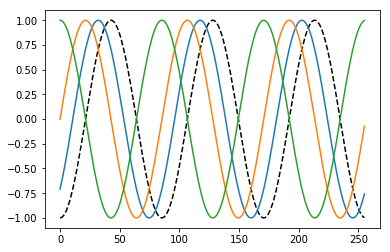

In [38]:
obs,y1,y2,y3,y4 = 0,0,0,0,0
n = np.arange(0,256)
N = n.shape[0]
k1 =3

fase1 = np.pi
fase2 = np.pi+np.pi/4 #45
fase3 = np.pi+np.pi/2 #180
fase4 = 2*np.pi
fase5 = 2*np.pi

amp1 =1.0
obs = amp1* cos((2*np.pi*k1*n/N)+(fase1)) #+np.random.normal(0,1,N)
y1 =  amp1 * cos((2*np.pi*k1*n/N)+(fase2))#+np.random.normal(0,1,N)
y2 =  amp1 * cos((2*np.pi*k1*n/N)+(fase3))
y3 =  amp1 * cos((2*np.pi*k1*n/N)+(fase4))
#y4 =  amp1 * cos((2*np.pi*k1*n/N)+(fase5))
#y5 =  amp1 * cos((2*np.pi*k1*n/N)+(fase5))

series = {}
series[0] = obs
series[1] = y1
series[2] = y2
series[3] = y3
#series[4] = y4
#series[5] = y5
plot(obs,'k--')
plot(y1)
plot(y2)
plot(y3)
#plot(y4)

In [40]:
f = 3/256.
coerdata={}
for i in series.keys():
    #
    coerdata[i] = coherence(series[i],series[0])
    frq= np.abs(coerdata[0]['f'][:] - f).argmin()
    #print( coerdata[i]['coer'][frq].real)
    print(coerdata[i]['fi'][frq].real )#*180/np.pi +180)
    #print(coerdata[i]['amp'][frq].real)

-0.0
0.7853981633974484
1.5707963267948966
3.141592653589793


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in arccos
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:109: RuntimeWarning: divide by zero encountered in true_divide


name cohere STD/STD[0] SKILL
pi/4 -2.220446049250313e-16 1.0 0.4999999999999999
freq= 125
name cohere STD/STD[0] SKILL
pi/2 -1.0 1.0 0.0
freq= 125
name cohere STD/STD[0] SKILL
pi 1.0 1.0 1.0
freq= 125
0.7853981633974484 1.0
1.5707963267948966 1.0
3.141592653589793 1.0


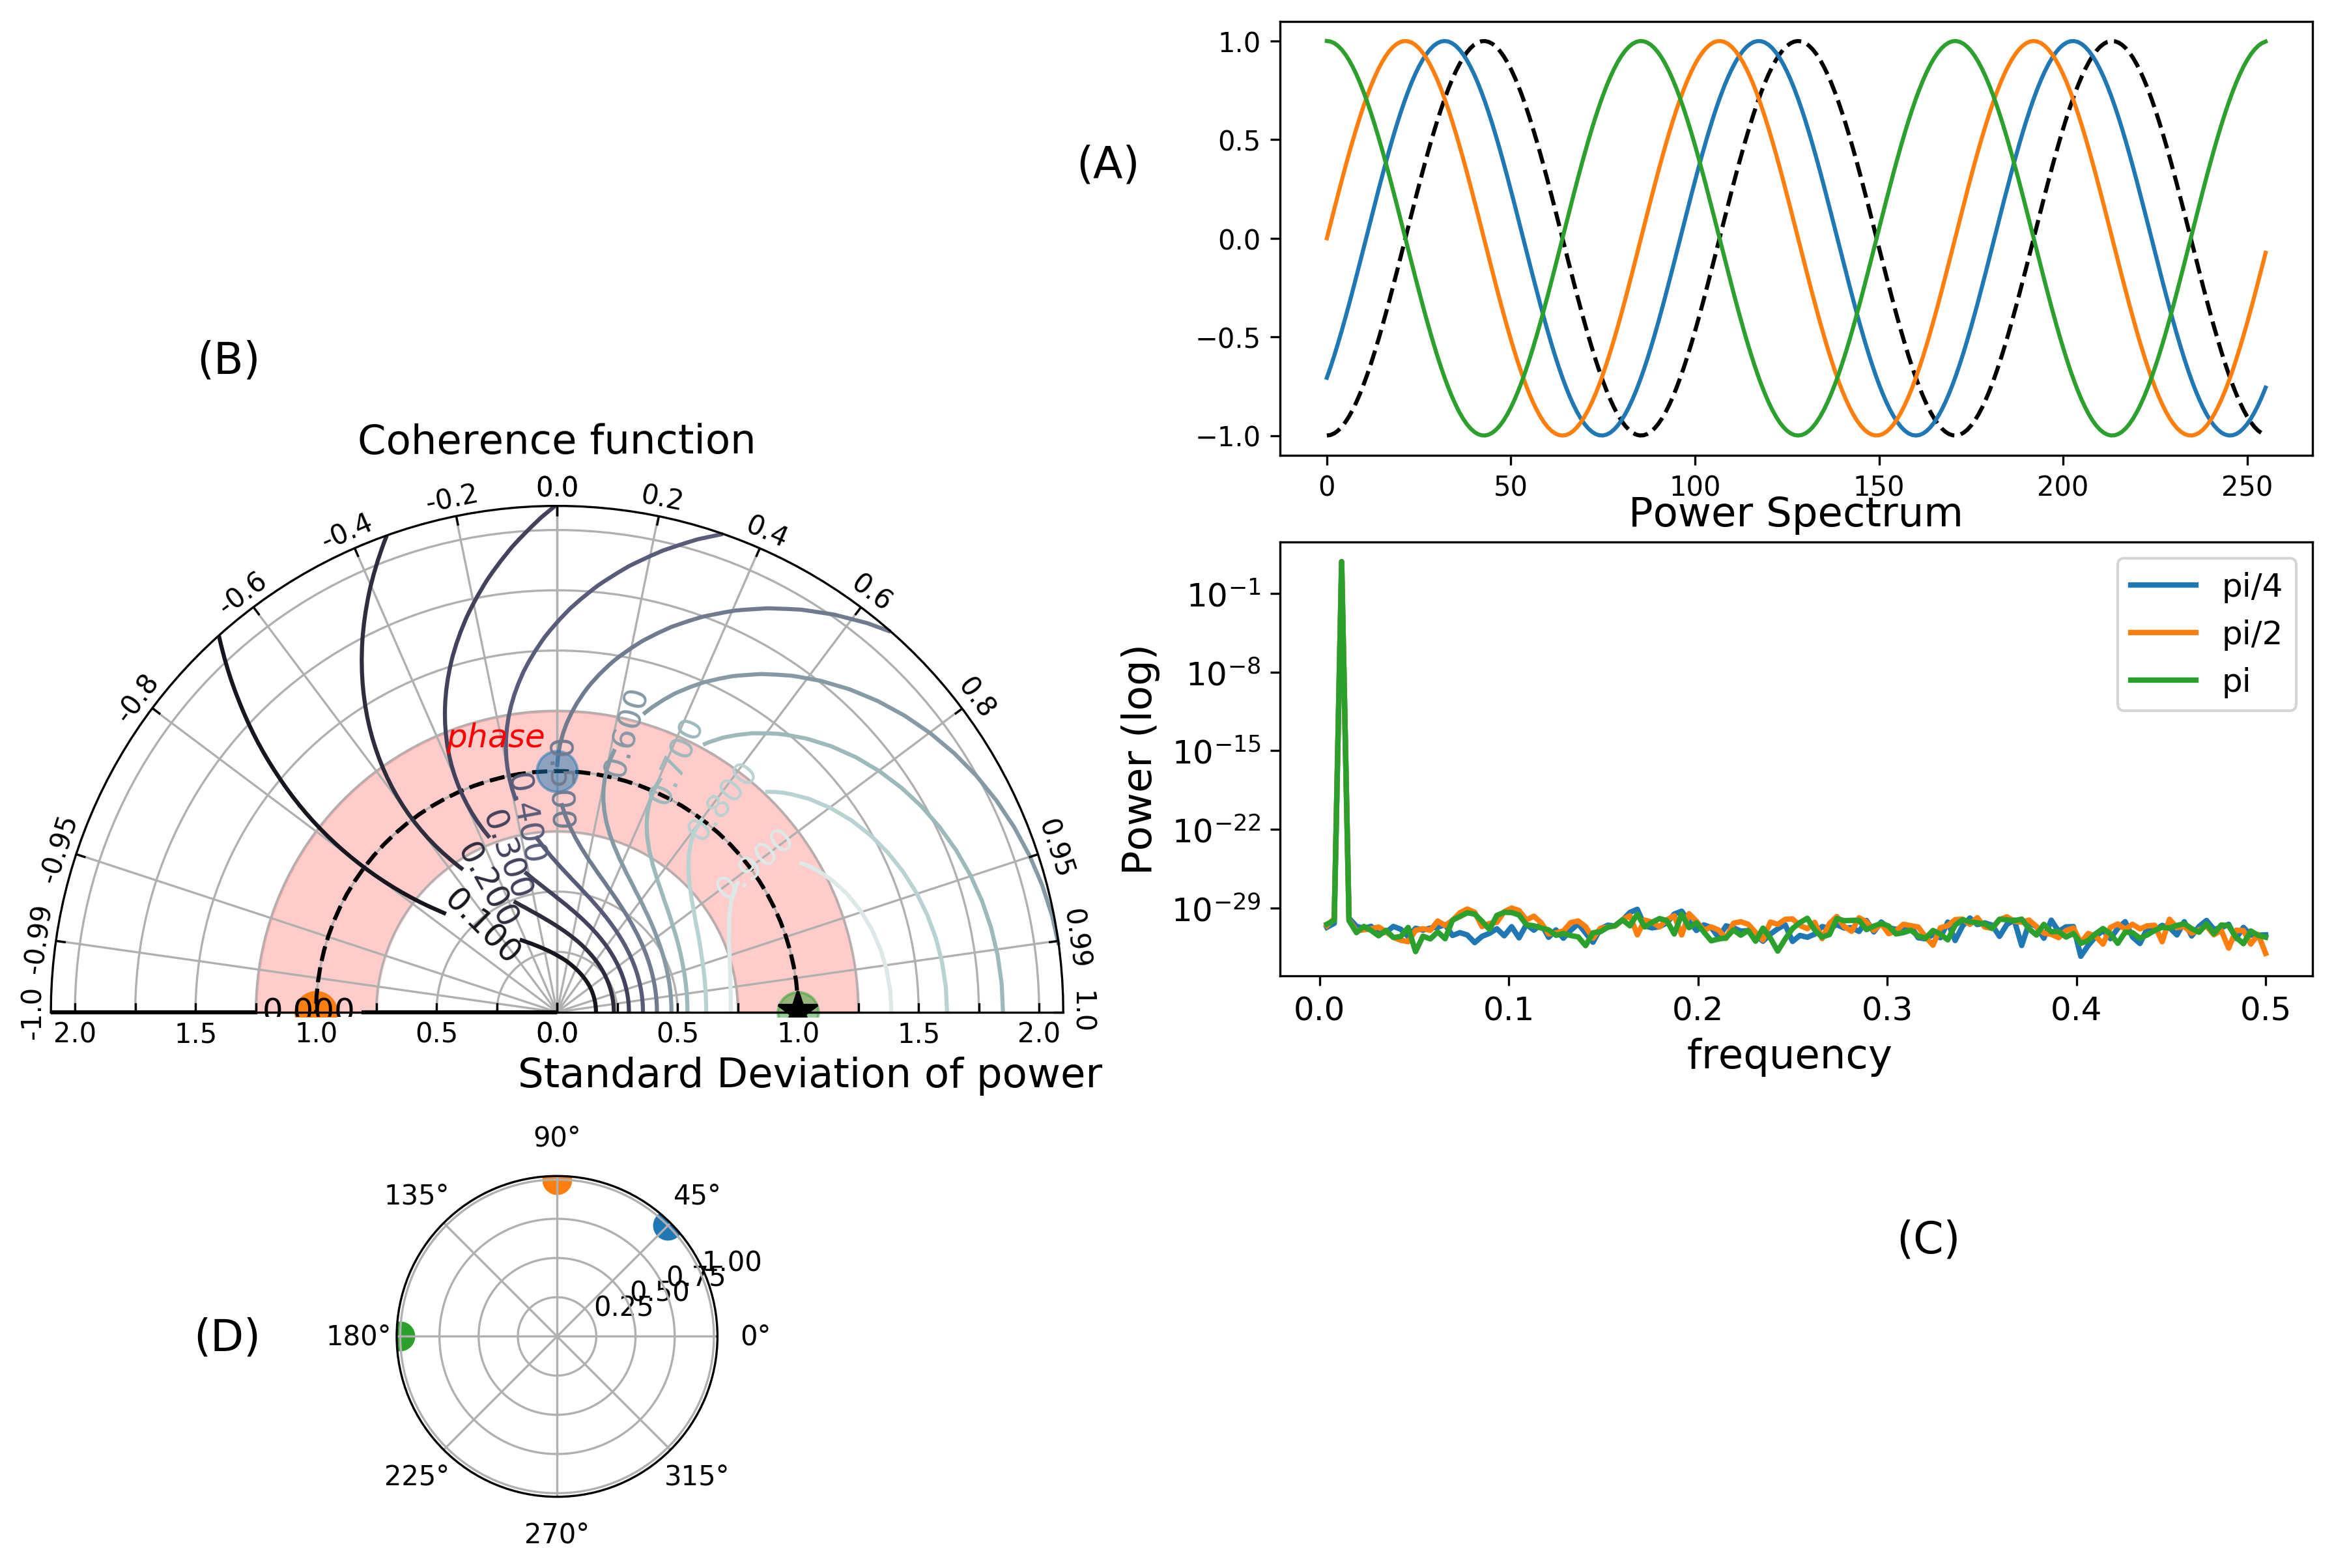

In [47]:
series_names =['OBS','pi/4','pi/2','pi']    
Spectral_diagram(series,series_names,f,'power')

# AMPLITUDE FEATURE


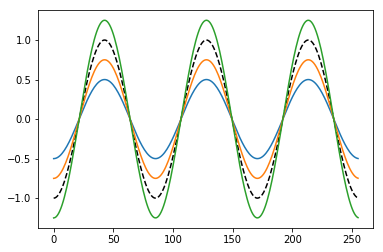

In [55]:
obs,y1,y2,y3,y4 = 0,0,0,0,0
n = np.arange(0,256)
N = n.shape[0]
k1 =3

fase1 = np.pi


amp1 =1.0
amp2 = 0.5
amp3 = 0.75
amp4 = 1.25
obs = amp1* cos((2*np.pi*k1*n/N)+(fase1)) #+np.random.normal(0,1,N)
y1 =  amp2 * cos((2*np.pi*k1*n/N)+(fase1))#+np.random.normal(0,1,N)
y2 =  amp3 * cos((2*np.pi*k1*n/N)+(fase1))
y3 =  amp4 * cos((2*np.pi*k1*n/N)+(fase1))
#y4 =  amp4 * cos((2*np.pi*k1*n/N)+(fase1))
#y5 =  amp1 * cos((2*np.pi*k1*n/N)+(fase5))

series = {}
series[0] = obs
series[1] = y1
series[2] = y2
series[3] = y3
#series[4] = y4
#series[5] = y5
plot(obs,'k--')
plot(y1)
plot(y2)
plot(y3)
#plot(y4)

In [56]:
def Spectral_diagram(series,s_name,f,var):
    """ Taylor Diagram : obs is reference data sample
        in a full diagram (0 --> npi)
        --------------------------------------------------------------------------
        Input: ref_phi - freq of reference  -- > lead to a phase reference
               cohere  - raw of coherence for test (call def cohere)
               phi     - raw of phases for test    (call def cohere)
               
    """
    import numpy as np
    from numpy import ma
    import mpl_toolkits.axisartist.grid_finder as GF
    import mpl_toolkits.axisartist.floating_axes as FA
    import matplotlib.pyplot as plt
    import statistics
    
    #f_ref = np.abs(f - series[0]['period'][:]).argmin() 
    
    coerdata,coer,std ={},{},{}
    #coerdata2 ={}
    amp,fi = {},{}
    
    for i in series.keys():
        series[i]   = hstack(series[i]) #make sure stack arrays in sequence horizontally (column wise)
        coerdata[i] = coherence(series[i],series[0])
        f_ref       = np.abs(coerdata[0]['f'][:] - f).argmin()   
        n           = len(coerdata[i]['sxx'])
        std[i]      = np.sqrt(1.0/n * pow((coerdata[i]['sxx'][f_ref] -np.mean(coerdata[i]['sxx'])),2))
        coer[i]     = coerdata[i]['coer'][f_ref].real
        amp[i]      = coerdata[i]['amp'][f_ref].real
        fi[i]       = coerdata[i]['fi'][f_ref].real
     
    ref = 1 #1
    #mean values to be R0
    numbers = [coer[key] for key in coer]
    MED = statistics.mean(numbers)
    MAX = np.max(numbers)
    
    rlocs = around(np.concatenate((np.arange(0,-10,-0.2),[-0.95,-0.99],np.arange(0,10,0.2),[0.95,0.99])),2)
    str_rlocs = np.concatenate((np.arange(0,10,0.2),[0.95,0.99],np.arange(0,10,0.2),[0.95,0.99]))
    tlocs = np.arccos(rlocs)        # Conversion to polar angles
    gl1 = GF.FixedLocator(tlocs)    # Positions
    tf1 = GF.DictFormatter(dict(zip(tlocs, map(str,rlocs))))
    

    str_locs2 = np.arange(-10,11,0.5)
    #rlocs2 = np.concatenate((np.arange(10)/10.,[0.95,0.99]))
    #rlocs2 = np.arange(-10,11,1)
    tlocs2 =  np.arange(-10,11,0.5)      # Conversion to polar angles
       
    g22 = GF.FixedLocator(tlocs2)  
    tf2 = GF.DictFormatter(dict(zip(tlocs2, map(str,str_locs2))))

    
    
    
    tr = PolarAxes.PolarTransform()
    
    smin = 0
    smax =2.1 

    ghelper = FA.GridHelperCurveLinear(tr,
                                           extremes=(0,np.pi, # 1st quadrant  np.pi/2
                                                     smin,smax),
                                           grid_locator1=gl1,
                                           #grid_locator2=g11,
                                           tick_formatter1=tf1,
                                           tick_formatter2=tf2,
                                           )
    fig = plt.figure(figsize=(15,10), dpi=300)
    ax = FA.FloatingSubplot(fig, 121, grid_helper=ghelper)

    fig.add_subplot(ax)
    ax.axis["top"].set_axis_direction("bottom") 
    ax.axis["top"].toggle(ticklabels=True, label=True)
    ax.axis["top"].major_ticklabels.set_axis_direction("top")
    ax.axis["top"].label.set_axis_direction("top")
    ax.axis["top"].label.set_text("Coherence function")
    ax.axis["top"].label.set_fontsize(15)
    
    ax.axis["left"].set_axis_direction("bottom") 
    ax.axis["left"].label.set_text("Standard Deviation of power")
    ax.axis["left"].label.set_fontsize(15)
    
    ax.axis["right"].set_axis_direction("top") 
    ax.axis["right"].toggle(ticklabels=True, label=True)
    ax.axis["right"].set_visible(True)
    ax.axis["right"].major_ticklabels.set_axis_direction("bottom")
   

    ax.axis["bottom"].set_visible(False) 

    ax.grid(True)

    ax = ax.get_aux_axes(tr)

    t = np.linspace(0, np.pi)
    r = np.zeros_like(t) + ref
    
    ax.plot(t,r, 'k--', label='_')


    rs,ts = np.meshgrid(np.linspace(smin,smax),
                            np.linspace(0,np.pi))

    
    #rms = np.sqrt(ref**2 + rs**2 - 2*ref*rs*np.cos(ts))
    #rms = (4*(1+np.cos(ts))**4/((rs+1/rs)**2 *(1+MAX)**4))#/std[0]
    rms = (4*(1+np.cos(ts))/((rs+1/rs)**2 *(1+MAX)))#/std[0]
    
    #rms = 1 *e**(-(ref-ts)*np.pi/180)
    CS =ax.contour(ts, rs,rms,[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],cmap = cm.bone)
    plt.clabel(CS, inline=1, fontsize=12)
    

    ax.plot(np.arccos(0.999999),ref,'k',marker='*',ls='', ms=15)
    aux = range(1,len(series.keys()))
    #del aux[ref]
    
        
    cd = ['blue','blue','blue','red', 'red','g','g']
    m = ['o','o','o','o','o']*10
    alf = [1,0.5,1,0.5,1,]*10
    rmse =[]
    for i in aux:
        std[i]=std[i]/std[0]
        ax.plot(np.arccos(coer[i]),std[i],marker=m[i],ms=15,alpha=alf[i],label='%s'%s_name[i])
        #rmse = np.sqrt (round((1**2 + (std[i])**2 - 2*1*(std[i])*coer[i]),3))
        skill = 4*(1+(coer[i]))/((std[i]+1/std[i])**2 *(1+MAX))
        
        #x = [np.arccos(coer[1]),np.arccos(coer[2])]
        #y = [std[1]/std[0],std[2]/std[0]]
        #ax.plot(x,y,'blue', linewidth = 0.3, alpha=0.7)
        
        #x = [np.arccos(coer[3]),np.arccos(coer[4])]
        #y = [std[3]/std[0],std[4]/std[0]]
        #ax.plot(x,y,'red', linewidth = 0.3, alpha=0.7)
        print ('name','cohere','STD/STD[0]','SKILL')
        print (s_name[i],coer [i], std[i], skill)
        print ('freq= %s'%f_ref)
        #print rs
        
    #legend(bbox_to_anchor=(1.1, 1),prop=dict(size='large'),loc='best')
    # -- explain -- Fig 3
    #plt.axhspan(-0.1, 0.2, facecolor='0.5', alpha=0.2)
    t1 = np.linspace(0,2)
    tx = np.linspace(0, np.pi/10)
    t2 =  np.zeros_like(tx) + 2.1
    ax.fill_between(tx,t2,color='b',facecolor='0.3', alpha=0.2)
    font = {'size'   : 12}
    plt.text(0.6, 0.4, '$amplitude$',color='b',fontdict=font,rotation=10)
    r1 = np.zeros_like(t) + 0.75
    r2 = np.zeros_like(t) + ref+0.25
    #ax.fill_between(t, r1, r2,color ='r',facecolor='0.3', alpha=0.2)
    #plt.text(-0.46, 1.1, '$phase$',color='r',fontdict=font, rotation=0)
 
    # --- polar ---
        
    ax = fig.add_subplot(427, projection='polar')
    #r = [1,1,1]
    #theta = [np.pi/2,np.pi/4,np.pi]
    #area = [100,100,100]
    #colors = theta
    #c = ax.scatter(theta, r,s=area, cmap='hsv', alpha=0.75)
    scale_factor=100
    for i in aux:
        
        ax.scatter(fi[i], std[i],s=amp[i]*scale_factor, cmap='hsv', alpha=1)
        print(fi[i],amp[i])
    
    # ---  time series  --- 
    ax = plt.subplot(3,2,2)
    ax.plot(series[0], 'k--')
    for i in aux:
        ax.plot(series[i])    
    # --- power spectrum  --
    cl = ['black','b:', 'b', 'r:','r','g:','g']
        
    line = [0.5,2,2,2,2,2]
    alfa = [0.5,1,1,1,1,1]
    
    ax = plt.subplot(3,2,4)
    #ax = plt.subplot(4,2,6)
    for i in aux:  

            ax.plot(coerdata[i]['f'][:],coerdata[i]['sxx'][:],alpha=alfa[i],label='%s'%s_name[i], linewidth =line[i] )

            ax.tick_params(axis='both', which='major', labelsize=12)
            ax.set_yscale('log')
            #ax.set_xscale('log')
            xlabel('frequency ',fontsize=15)
            ylabel('Power (log)',fontsize=15)
            ax.set_title('Power Spectrum',fontsize=15)
            
            
            

    legend(bbox_to_anchor=(1, 1),prop=dict(size='large'),loc='best')   
    
    #plt.tight_layout()
    # -- STD vs TD -- Fig4
    fig.text (.5, .8,"(A)",horizontalalignment='right',fontsize=16)
    fig.text (.2, .7,"(B)",horizontalalignment='right',fontsize=16)
    fig.text (.78, .25,"(C)",horizontalalignment='right',fontsize=16)  
    fig.text (.2, .2,"(D)",horizontalalignment='right',fontsize=16)
    plt.savefig('figs/amp_explain.png',bbox_inches='tight')
    #fig.text (.5, .95,"SPECTRAL Taylor Diagram",horizontalalignment='center',fontsize=16)
    pylab.show()
    return


In [57]:
f = 3/256.
coerdata={}
for i in series.keys():
    #
    coerdata[i] = coherence(series[i],series[0])
    frq= np.abs(coerdata[0]['f'][:] - f).argmin()
    #print( coerdata[i]['coer'][frq].real)
    print(coerdata[i]['fi'][frq].real )#*180/np.pi +180)
    #print(coerdata[i]['amp'][frq].real)

-0.0
-0.0
-1.0408340855860843e-17
7.077671781985372e-17


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in arccos
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:109: RuntimeWarning: divide by zero encountered in true_divide


name cohere STD/STD[0] SKILL
0.5 1.0 0.25 0.22145328719723184
freq= 125
name cohere STD/STD[0] SKILL
0.75 1.0 0.5625 0.7303401456383344
freq= 125
name cohere STD/STD[0] SKILL
1.25 1.0 1.5624999999999998 0.8245711907709872
freq= 125
-0.0 0.5
-1.0408340855860843e-17 0.75
7.077671781985372e-17 1.25


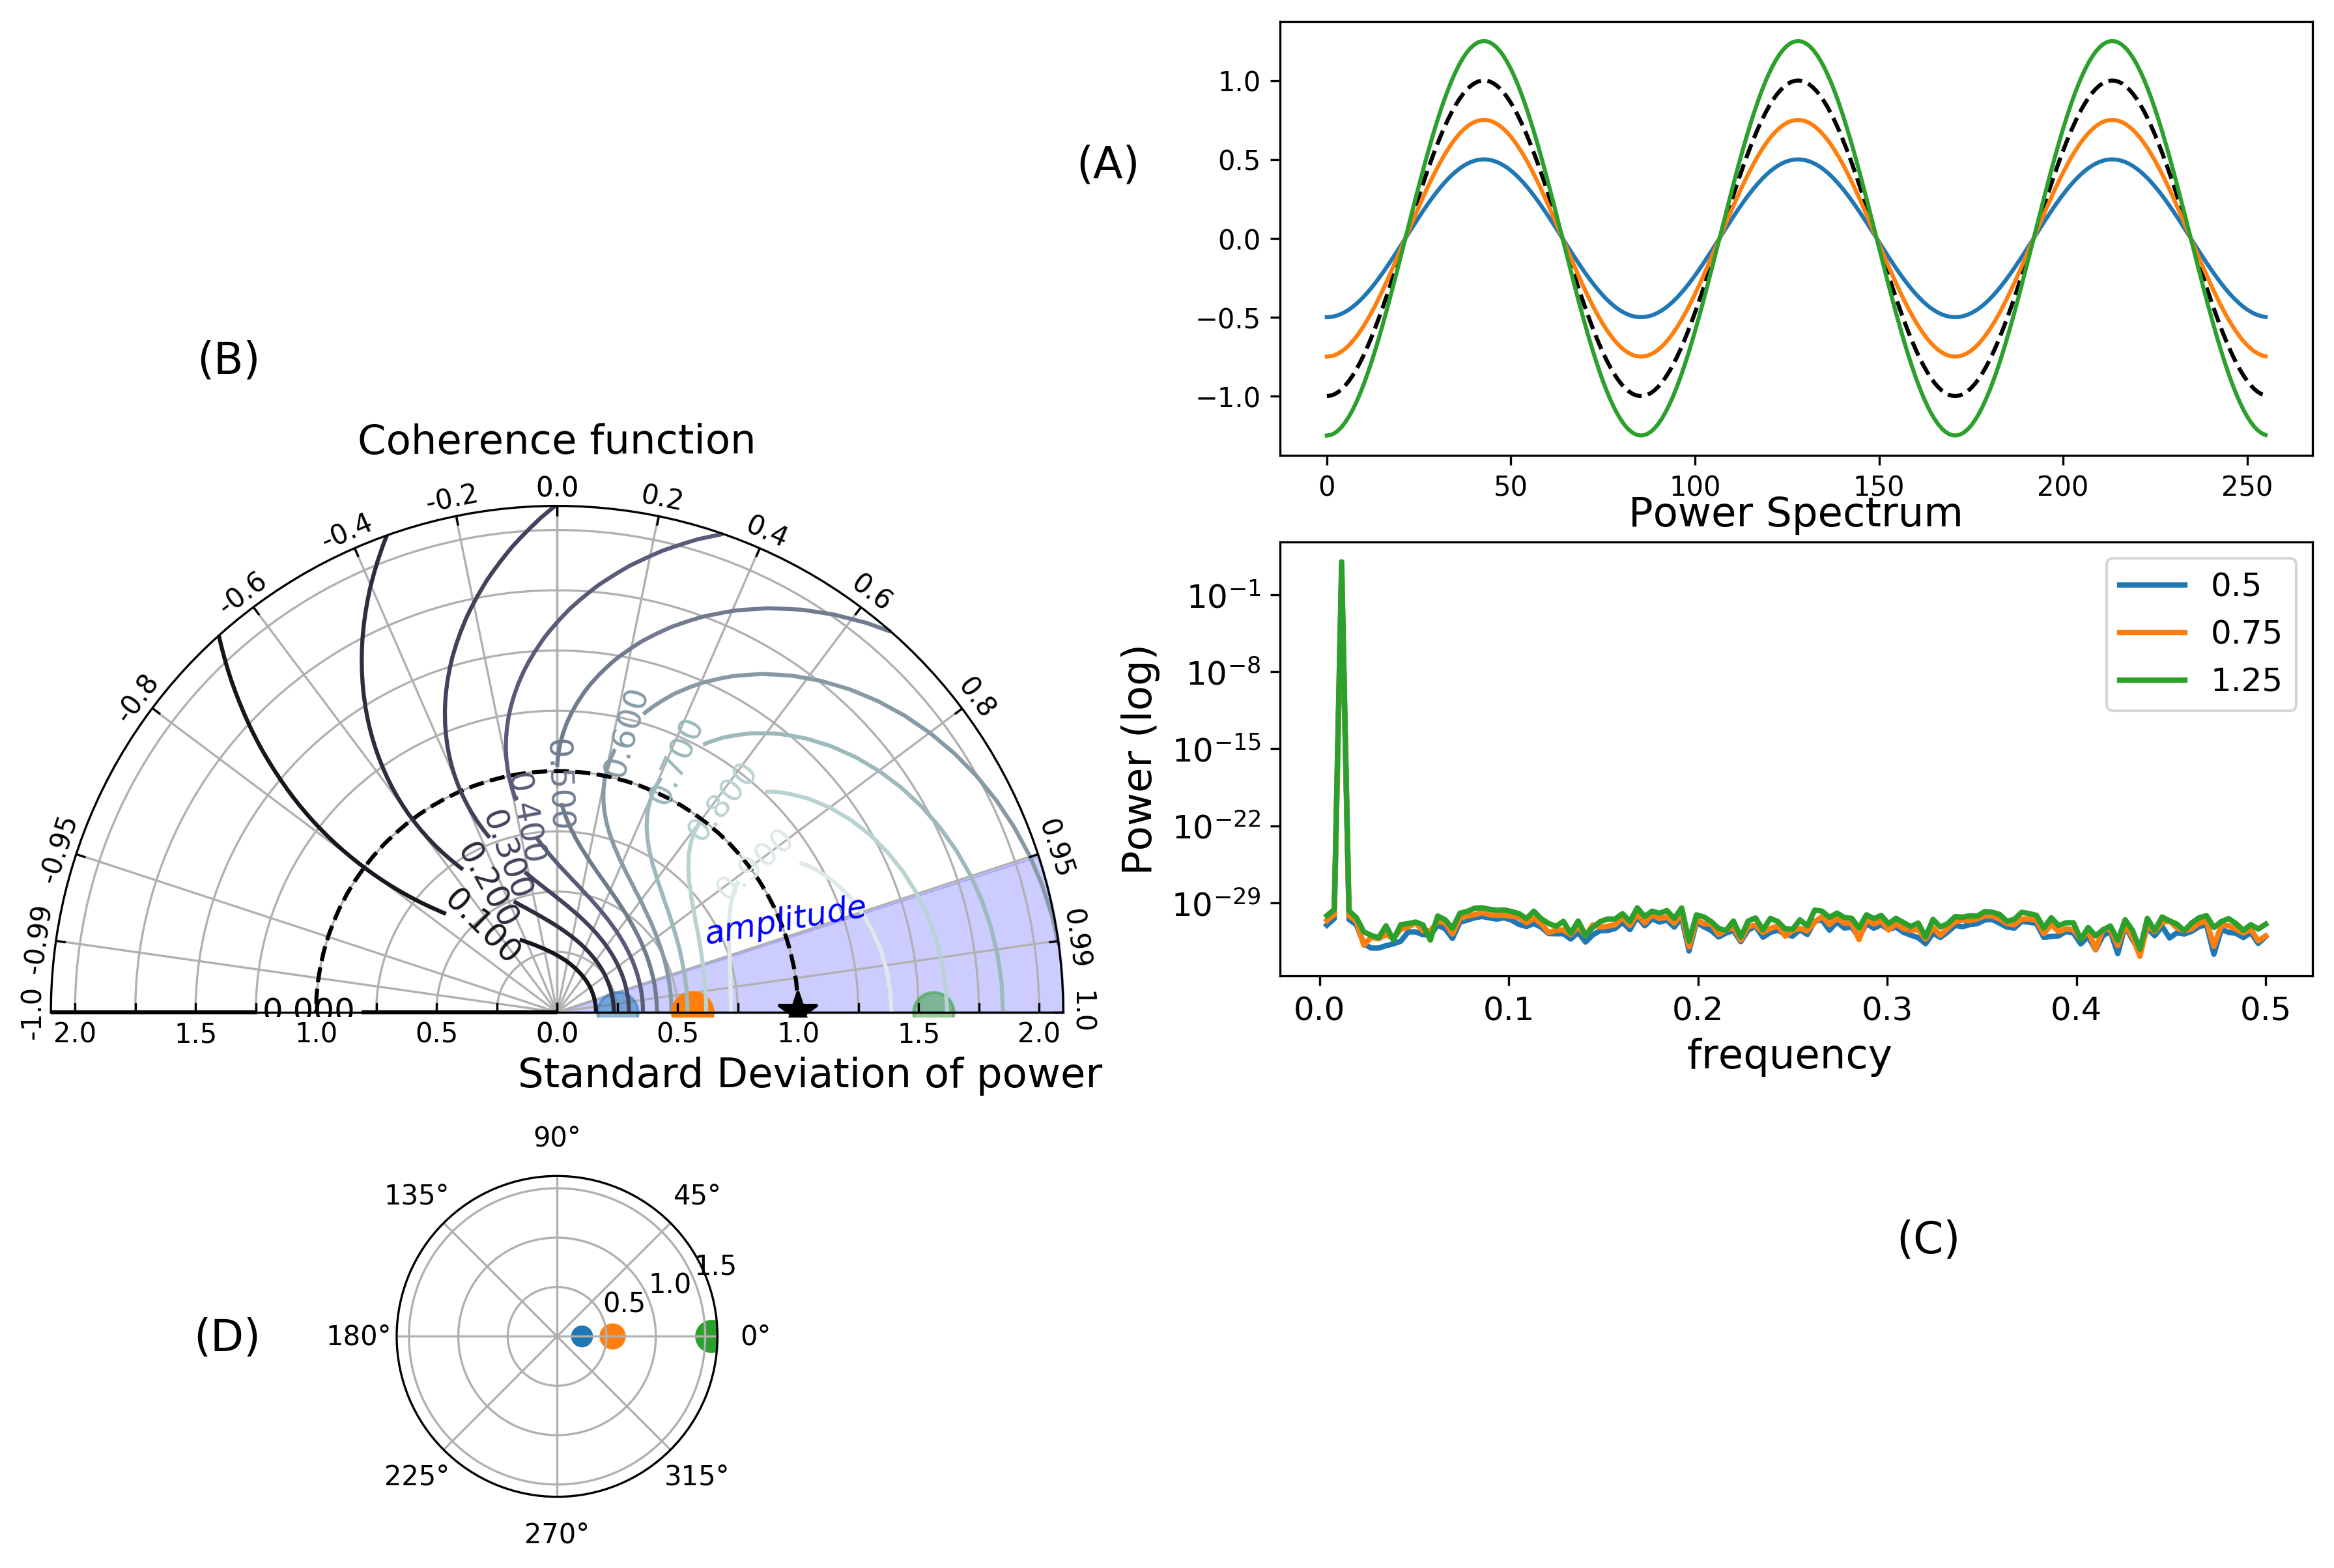

In [58]:
series_names =['OBS','0.5','0.75','1.25']    
Spectral_diagram(series,series_names,f,'power')

# Non-stationary 

*  AMP

In [4]:
def Spectral_diagram(series,s_name,f,var):
    """ Taylor Diagram : obs is reference data sample
        in a full diagram (0 --> npi)
        --------------------------------------------------------------------------
        Input: ref_phi - freq of reference  -- > lead to a phase reference
               cohere  - raw of coherence for test (call def cohere)
               phi     - raw of phases for test    (call def cohere)
               
    """
    import numpy as np
    from numpy import ma
    import mpl_toolkits.axisartist.grid_finder as GF
    import mpl_toolkits.axisartist.floating_axes as FA
    import matplotlib.pyplot as plt
    import statistics
    
    #f_ref = np.abs(f - series[0]['period'][:]).argmin() 
    
    coerdata,coer,std ={},{},{}
    #coerdata2 ={}
    amp,fi = {},{}
    
    for i in series.keys():
        series[i]   = hstack(series[i]) #make sure stack arrays in sequence horizontally (column wise)
        coerdata[i] = coherence(series[i],series[0])
        f_ref       = np.abs(coerdata[0]['f'][:] - f).argmin()   
        n           = len(coerdata[i]['sxx'])
        std[i]      = np.sqrt(1.0/n * pow((coerdata[i]['sxx'][f_ref] -np.mean(coerdata[i]['sxx'])),2))
        coer[i]     = coerdata[i]['coer'][f_ref].real
        amp[i]      = coerdata[i]['amp'][f_ref].real
        fi[i]       = coerdata[i]['fi'][f_ref].real
     
    ref = 1 #1
    #mean values to be R0
    numbers = [coer[key] for key in coer]
    MED = statistics.mean(numbers)
    MAX = np.max(numbers)
    
    rlocs = around(np.concatenate((np.arange(0,-10,-0.2),[-0.95,-0.99],np.arange(0,10,0.2),[0.95,0.99])),2)
    str_rlocs = np.concatenate((np.arange(0,10,0.2),[0.95,0.99],np.arange(0,10,0.2),[0.95,0.99]))
    tlocs = np.arccos(rlocs)        # Conversion to polar angles
    gl1 = GF.FixedLocator(tlocs)    # Positions
    tf1 = GF.DictFormatter(dict(zip(tlocs, map(str,rlocs))))
    

    str_locs2 = np.arange(-10,11,0.5)
    #rlocs2 = np.concatenate((np.arange(10)/10.,[0.95,0.99]))
    #rlocs2 = np.arange(-10,11,1)
    tlocs2 =  np.arange(-10,11,0.5)      # Conversion to polar angles
       
    g22 = GF.FixedLocator(tlocs2)  
    tf2 = GF.DictFormatter(dict(zip(tlocs2, map(str,str_locs2))))

    
    
    
    tr = PolarAxes.PolarTransform()
    
    smin = 0
    smax =2.1 

    ghelper = FA.GridHelperCurveLinear(tr,
                                           extremes=(0,np.pi, # 1st quadrant  np.pi/2
                                                     smin,smax),
                                           grid_locator1=gl1,
                                           #grid_locator2=g11,
                                           tick_formatter1=tf1,
                                           tick_formatter2=tf2,
                                           )
    fig = plt.figure(figsize=(15,10), dpi=300)
    ax = FA.FloatingSubplot(fig, 121, grid_helper=ghelper)

    fig.add_subplot(ax)
    ax.axis["top"].set_axis_direction("bottom") 
    ax.axis["top"].toggle(ticklabels=True, label=True)
    ax.axis["top"].major_ticklabels.set_axis_direction("top")
    ax.axis["top"].label.set_axis_direction("top")
    ax.axis["top"].label.set_text("Coherence function")
    ax.axis["top"].label.set_fontsize(15)
    
    ax.axis["left"].set_axis_direction("bottom") 
    ax.axis["left"].label.set_text("Standard Deviation of power")
    ax.axis["left"].label.set_fontsize(15)
    
    ax.axis["right"].set_axis_direction("top") 
    ax.axis["right"].toggle(ticklabels=True, label=True)
    ax.axis["right"].set_visible(True)
    ax.axis["right"].major_ticklabels.set_axis_direction("bottom")
   

    ax.axis["bottom"].set_visible(False) 

    ax.grid(True)

    ax = ax.get_aux_axes(tr)

    t = np.linspace(0, np.pi)
    r = np.zeros_like(t) + ref
    
    ax.plot(t,r, 'k--', label='_')


    rs,ts = np.meshgrid(np.linspace(smin,smax),
                            np.linspace(0,np.pi))

    
    #rms = np.sqrt(ref**2 + rs**2 - 2*ref*rs*np.cos(ts))
    #rms = (4*(1+np.cos(ts))**4/((rs+1/rs)**2 *(1+MAX)**4))#/std[0]
    rms = (4*(1+np.cos(ts))/((rs+1/rs)**2 *(1+MAX)))#/std[0]
    
    #rms = 1 *e**(-(ref-ts)*np.pi/180)
    CS =ax.contour(ts, rs,rms,[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],cmap = cm.bone)
    plt.clabel(CS, inline=1, fontsize=12)
    

    ax.plot(np.arccos(0.999999),ref,'k',marker='*',ls='', ms=15)
    aux = range(1,len(series.keys()))
    #del aux[ref]
    
        
    cd = ['blue','blue','blue','red', 'red','g','g']
    m = ['o','o','o','o','o']*10
    alf = [1,0.5,1,0.5,1,]*10
    rmse =[]
    for i in aux:
        std[i]=std[i]/std[0]
        ax.plot(np.arccos(coer[i]),std[i],marker=m[i],ms=15,alpha=alf[i],label='%s'%s_name[i])
        #rmse = np.sqrt (round((1**2 + (std[i])**2 - 2*1*(std[i])*coer[i]),3))
        skill = 4*(1+(coer[i]))/((std[i]+1/std[i])**2 *(1+MAX))
        
        #x = [np.arccos(coer[1]),np.arccos(coer[2])]
        #y = [std[1]/std[0],std[2]/std[0]]
        #ax.plot(x,y,'blue', linewidth = 0.3, alpha=0.7)
        
        #x = [np.arccos(coer[3]),np.arccos(coer[4])]
        #y = [std[3]/std[0],std[4]/std[0]]
        #ax.plot(x,y,'red', linewidth = 0.3, alpha=0.7)
        print ('name','cohere','STD/STD[0]','SKILL')
        print (s_name[i],coer [i], std[i], skill)
        print ('freq= %s'%f_ref)
        #print rs
        
    #legend(bbox_to_anchor=(1.1, 1),prop=dict(size='large'),loc='best')
    # -- explain -- Fig 3
    #plt.axhspan(-0.1, 0.2, facecolor='0.5', alpha=0.2)
    t1 = np.linspace(0,2)
    tx = np.linspace(0, np.pi/10)
    t2 =  np.zeros_like(tx) + 2.1
    #ax.fill_between(tx,t2,color='b',facecolor='0.3', alpha=0.2)
    font = {'size'   : 12}
    #plt.text(0.6, 0.4, '$amplitude$',color='b',fontdict=font,rotation=10)
    #r1 = np.zeros_like(t) + 0.75
    #r2 = np.zeros_like(t) + ref+0.25
    #ax.fill_between(t, r1, r2,color ='r',facecolor='0.3', alpha=0.2)
    #plt.text(-0.46, 1.1, '$phase$',color='r',fontdict=font, rotation=0)
 
    # --- polar ---
        
    ax = fig.add_subplot(427, projection='polar')
    #r = [1,1,1]
    #theta = [np.pi/2,np.pi/4,np.pi]
    #area = [100,100,100]
    #colors = theta
    #c = ax.scatter(theta, r,s=area, cmap='hsv', alpha=0.75)
    scale_factor=100
    for i in aux:
        
        ax.scatter(fi[i], std[i],s=amp[i]*scale_factor, cmap='hsv', alpha=1)
        print(fi[i],amp[i])
    
    # ---  time series  --- 
    ax = plt.subplot(3,2,2)
    ax.plot(series[0], 'k--')
    for i in aux:
        ax.plot(series[i])    
    # --- power spectrum  --
    cl = ['black','b:', 'b', 'r:','r','g:','g']
        
    line = [0.5,2,2,2,2,2]
    alfa = [0.5,1,1,1,1,1]
    
    ax = plt.subplot(3,2,4)
    #ax = plt.subplot(4,2,6)
    for i in aux:  

            ax.plot(coerdata[i]['f'][:],coerdata[i]['sxx'][:],alpha=alfa[i],label='%s'%s_name[i], linewidth =line[i] )

            ax.tick_params(axis='both', which='major', labelsize=12)
            ax.set_yscale('log')
            #ax.set_xscale('log')
            xlabel('frequency ',fontsize=15)
            ylabel('Power (log)',fontsize=15)
            ax.set_title('Power Spectrum',fontsize=15)
            
            
            

    legend(bbox_to_anchor=(1, 1),prop=dict(size='large'),loc='best')   
    
    #plt.tight_layout()
    # -- STD vs TD -- Fig4
    fig.text (.5, .8,"(A)",horizontalalignment='right',fontsize=16)
    fig.text (.2, .7,"(B)",horizontalalignment='right',fontsize=16)
    fig.text (.78, .25,"(C)",horizontalalignment='right',fontsize=16)  
    fig.text (.2, .2,"(D)",horizontalalignment='right',fontsize=16)
    plt.savefig('figs/non_amp2_explain.png',bbox_inches='tight')
    #fig.text (.5, .95,"SPECTRAL Taylor Diagram",horizontalalignment='center',fontsize=16)
    pylab.show()
    return


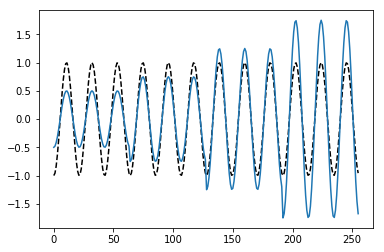

In [125]:
obs,y1,y2,y3,y4 = 0,0,0,0,0
n = np.arange(0,256)
n1 = np.arange(0,64)
N = n.shape[0]
k1 =12

fase1 = np.pi


amp1 =1.0
amp2 = 0.5
amp3 = 0.75
amp4 = 1.25
amp5 = 1.75
obs = amp1* cos((2*np.pi*k1*n/N)+(fase1)) #+np.random.normal(0,1,N)
y1 =  amp2 * cos((2*np.pi*k1*n1/N)+(fase1))#+np.random.normal(0,1,N)
y2 =  amp3 * cos((2*np.pi*k1*n1/N)+(fase1))
y3 =  amp4 * cos((2*np.pi*k1*n1/N)+(fase1))
y4 =  amp5 * cos((2*np.pi*k1*n1/N)+(fase1))
#y5 =  amp1 * cos((2*np.pi*k1*n/N)+(fase5))

t1 = np.concatenate((y1,y2),axis=0)
t2 = np.concatenate((t1,y3),axis=0)
t3 = np.concatenate((t2,y4),axis=0)


series = {}
series[0] = obs
series[1] = t3
#series[2] = y2
#series[3] = y3
#series[4] = y4
#series[5] = y5
plot(obs,'k--')
plot(t3)
#plot(y2)
#plot(y3)
#plot(y4)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in arccos
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:109: RuntimeWarning: divide by zero encountered in true_divide


name cohere STD/STD[0] SKILL
non-stationary amp 1.0 1.1270915354330708 0.9858216531268819
freq= 116
5.009345705276742e-16 1.0625


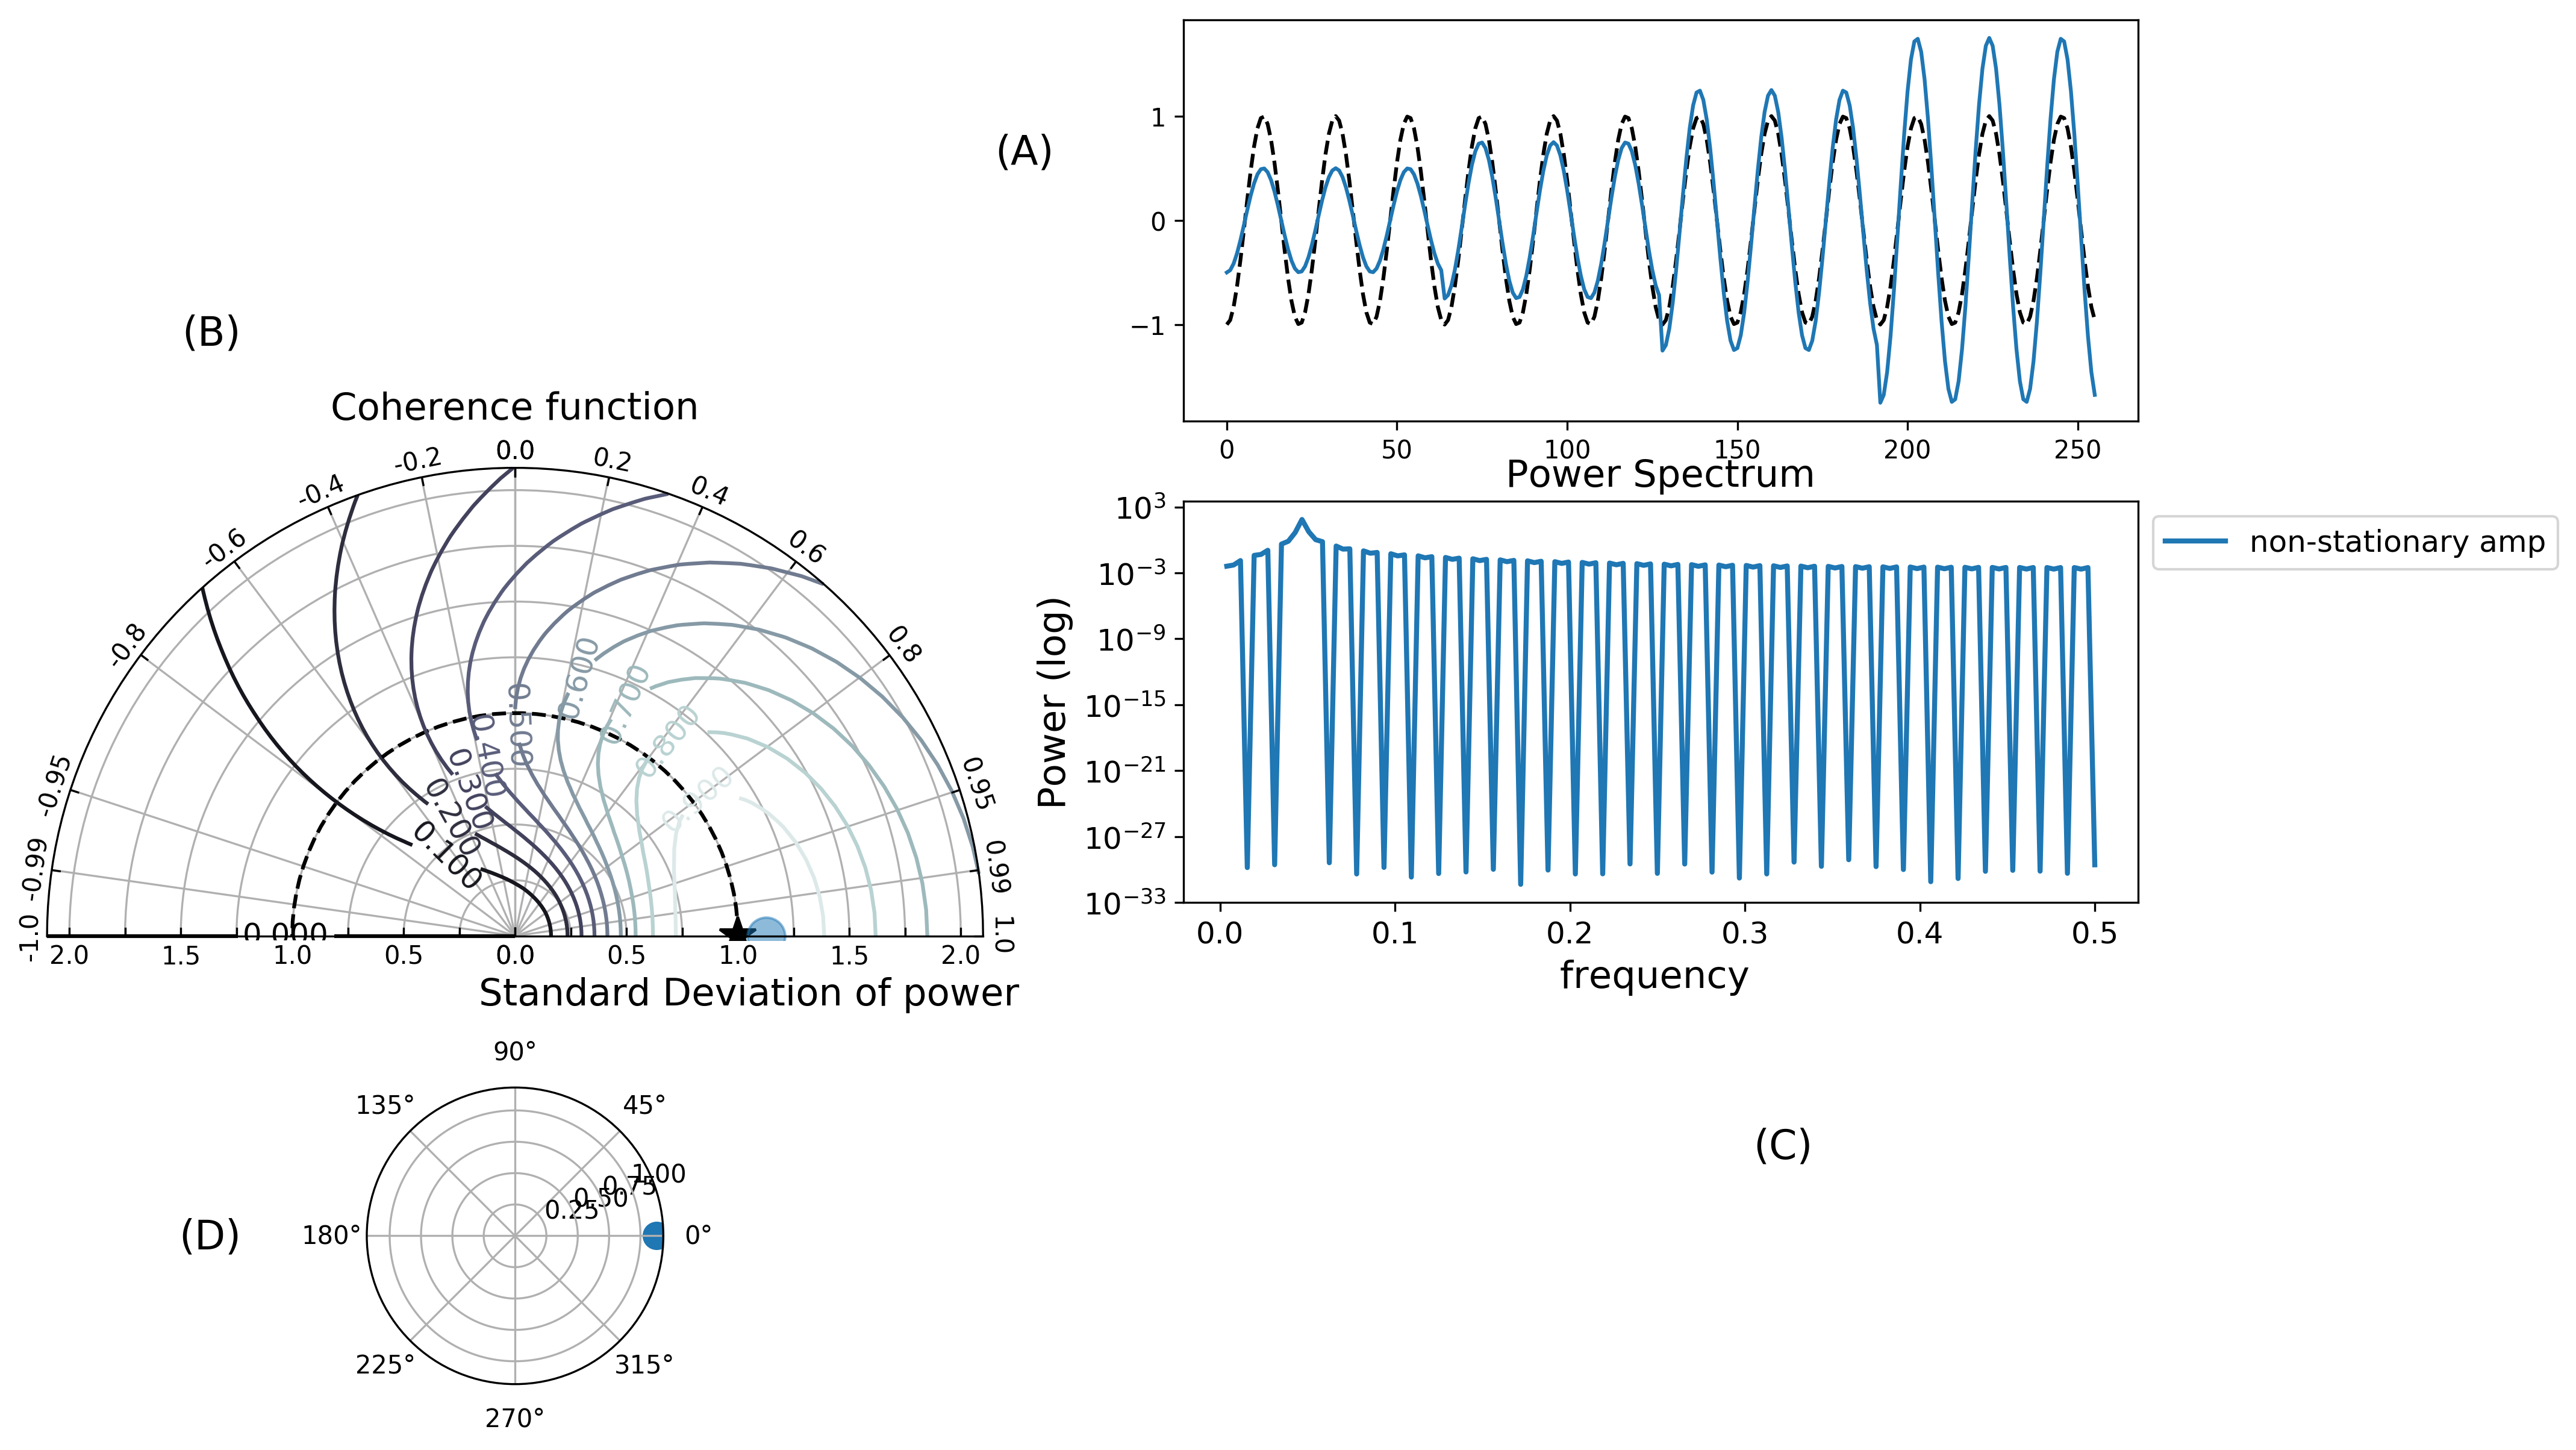

In [126]:
f = 12/256.
series_names =['OBS','non-stationary amp']    
Spectral_diagram(series,series_names,f,'power')

540 540


(-2, 2)

Text(0.28, 0.95, '(A)')

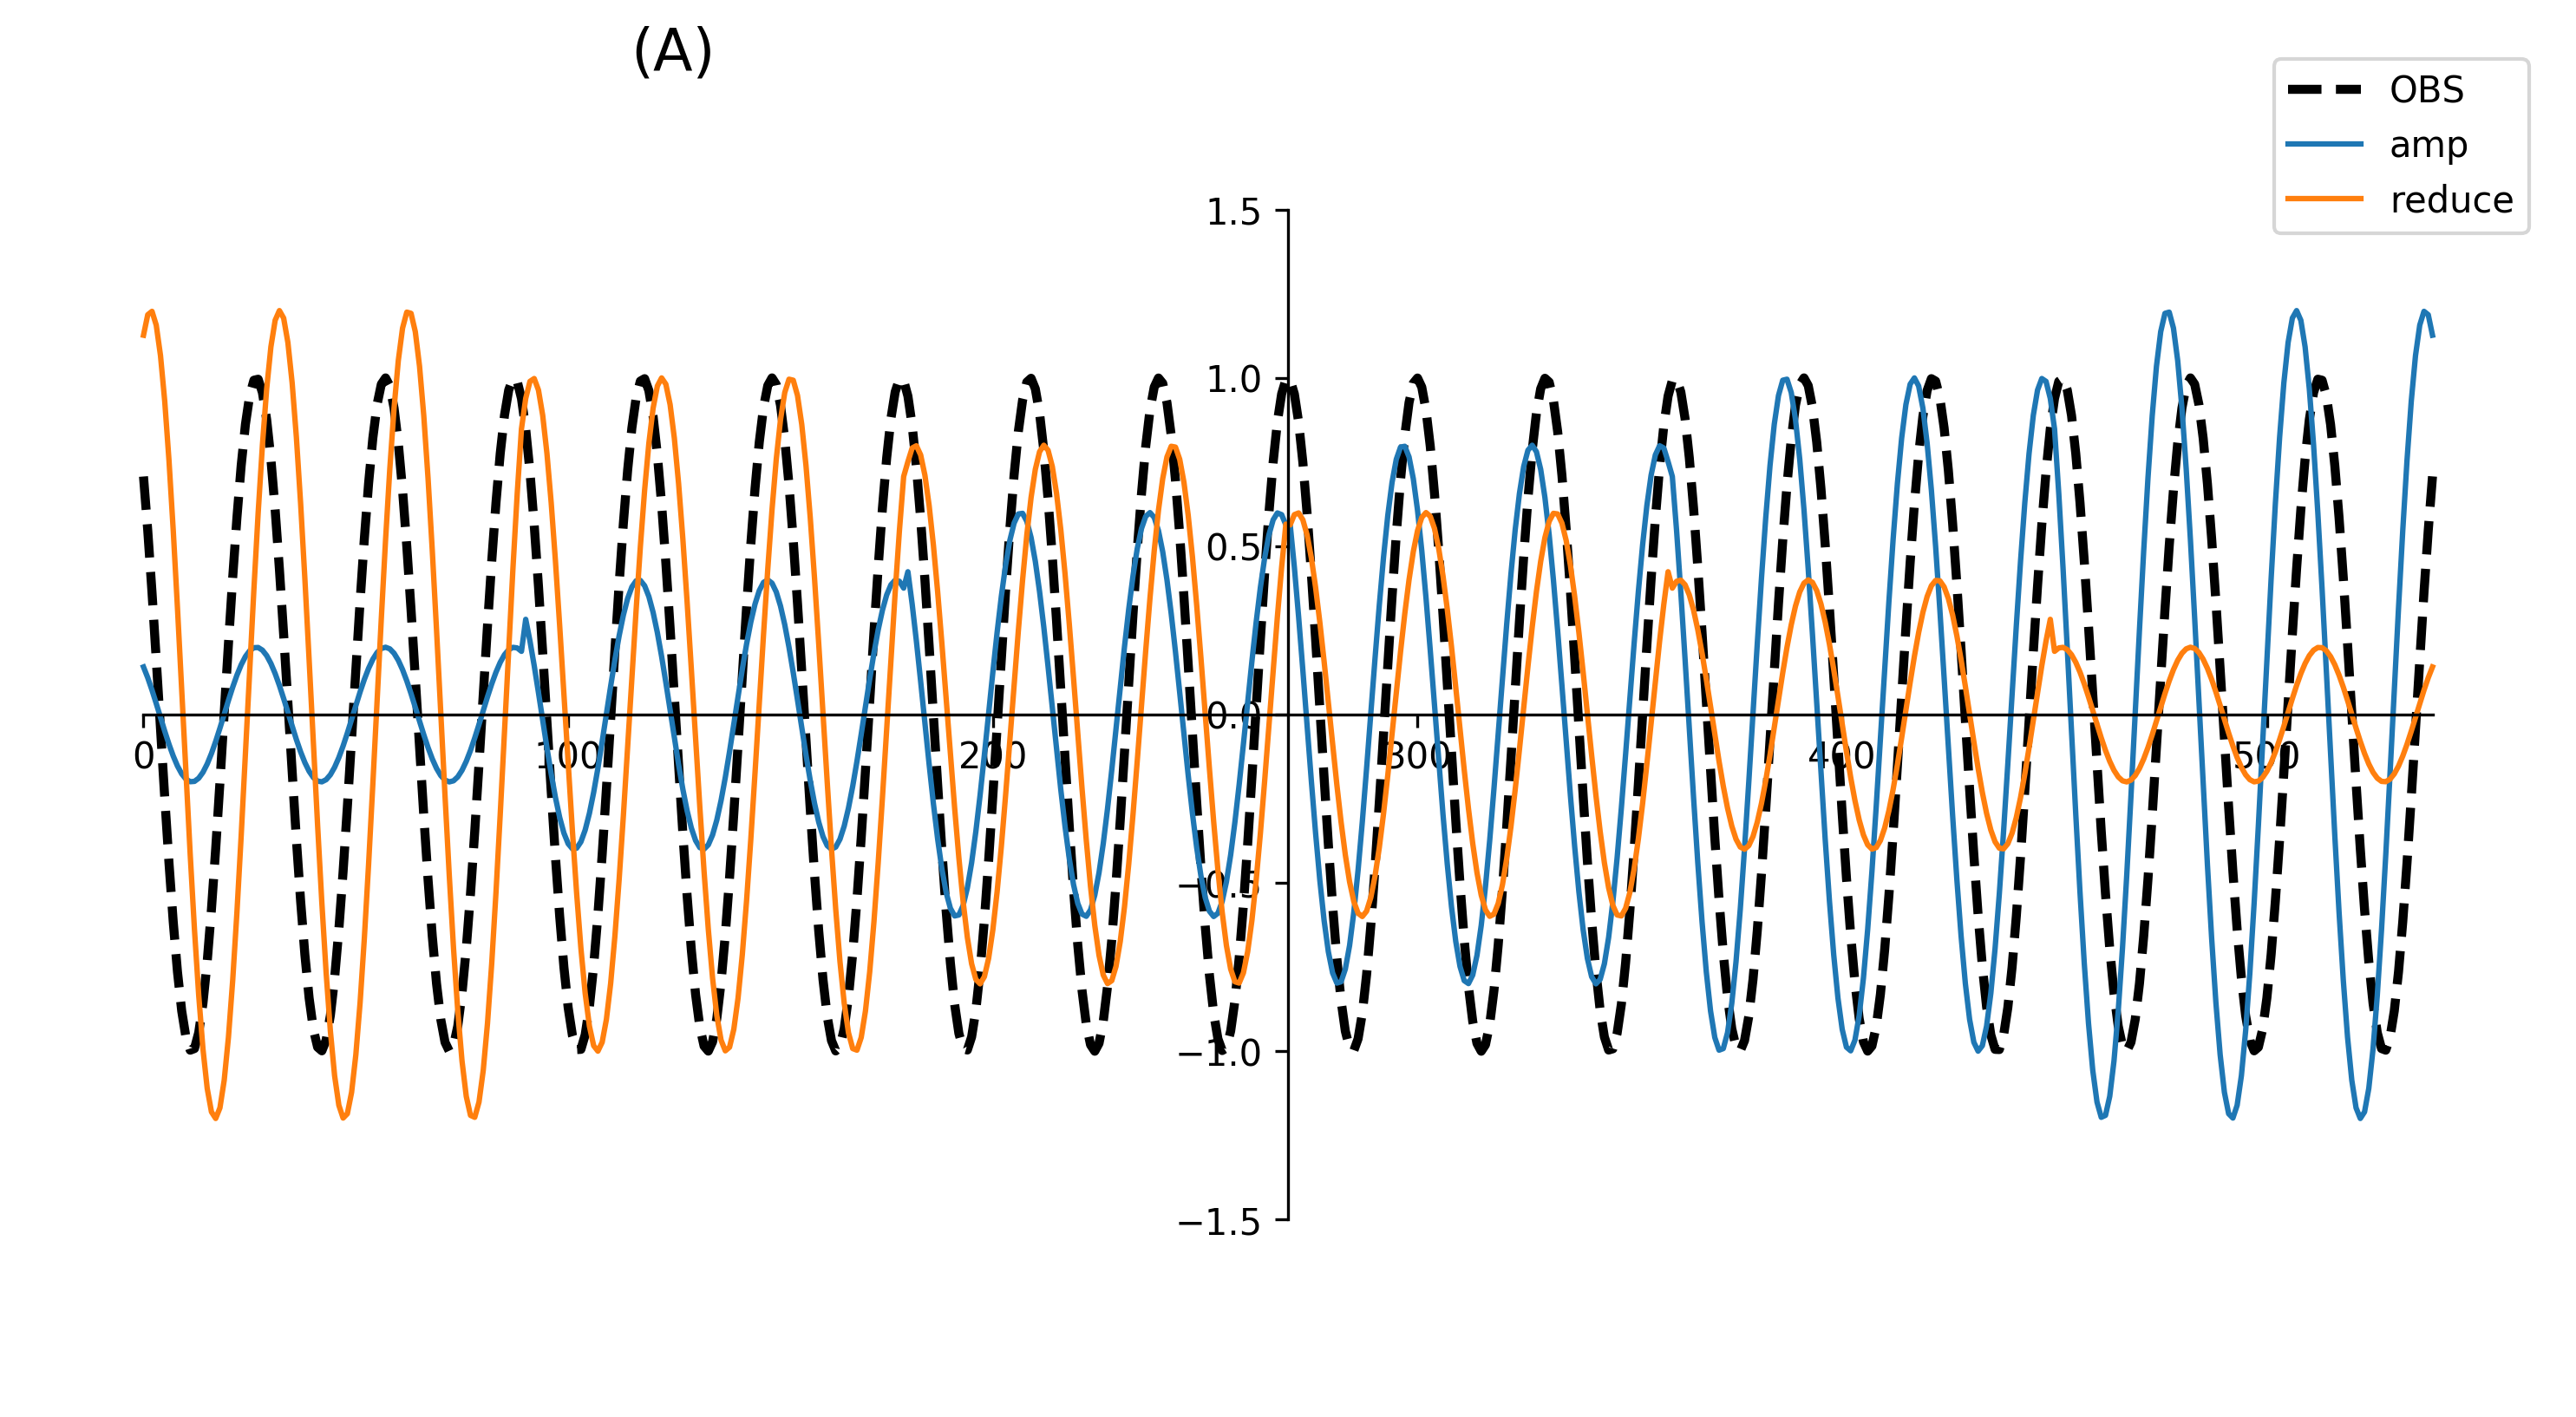

In [7]:
obs,y1,y2,y3,y4 = 0,0,0,0,0
n = np.arange(0,540)
N = n.shape[0]
n1 = np.arange(0,90)
N1 = n1.shape[0]


k1 =17.783



fase0 =0
fase1 = 0    #np.pi/6
fase2 = np.pi/4  #np.pi/4 #45
fase3 = np.pi/2 #np.pi/3 #180
fase4 = 2*np.pi #np.pi/2

amp0 = 0.2
amp1 = 0.4
amp2 = 0.6
amp3 = 0.8
amp4 = 1.0
amp5 = 1.2


obs = amp4* cos((2*np.pi*k1*n/N)+(fase2)) #+np.random.normal(0,1,N)
a0= amp0* cos((2*np.pi*k1*n1/N)+(fase2))
a1 = amp1* cos((2*np.pi*k1*n1/N)+(fase2))
a2 = amp2* cos((2*np.pi*k1*n1/N)+(fase2))
a3 = amp3* cos((2*np.pi*k1*n1/N)+(fase2))
a4 = amp4* cos((2*np.pi*k1*n1/N)+(fase2))
a5 = amp5* cos((2*np.pi*k1*n1/N)+(fase2))

ya =  np.concatenate((a0,a1), axis =0)
yb =  np.concatenate((ya,a2), axis =0)
yc =  np.concatenate((yb,a3), axis =0)
yd =  np.concatenate((yc,a4), axis =0)
y1 =  np.concatenate((yd,a5), axis =0)



y2 = y1[::-1]
series = {}
series[0] = obs
series[1] = y1
series[2] = y2


print (len(series[0]),len(series[1]))

#series_names =['OBS','pi/6','pi/4','pi/3','pi/2']  
series_names =['OBS','amplified','reduce']  

fig = plt.figure(figsize=(10,5.5), dpi=300)


ax = fig.add_subplot(1,1,1)
ax.plot(obs,'k--', linewidth=2.5, label = series_names[0])
ax.plot(y1, linewidth=1.5, label = 'amp')

ax.plot(y2, linewidth=1.5, label = 'reduce')


ylim(-2,2)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['left'].set_position('center')
ax.spines['left'].set_smart_bounds(True)
ax.spines['bottom'].set_position('center')
ax.spines['bottom'].set_smart_bounds(True)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
legend(bbox_to_anchor=(1, 1),prop=dict(size='medium'),loc='best')

fig.text (.28, .95,"(A)",horizontalalignment='right',fontsize=16)
plt.savefig('figs/anti_amp_A.png',bbox_inches='tight')


plt.tight_layout()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in arccos
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:109: RuntimeWarning: divide by zero encountered in true_divide


name cohere STD/STD[0] SKILL
amplified 0.4109360108369392 0.5750015712964721 0.5269420291238182
freq= 252
name cohere STD/STD[0] SKILL
reduce 0.4101412367655906 0.5750015712964718 0.5266452049881838
freq= 252
0.5736578980874825 0.6967110280762457
-0.5740937044320876 0.6967110280762455


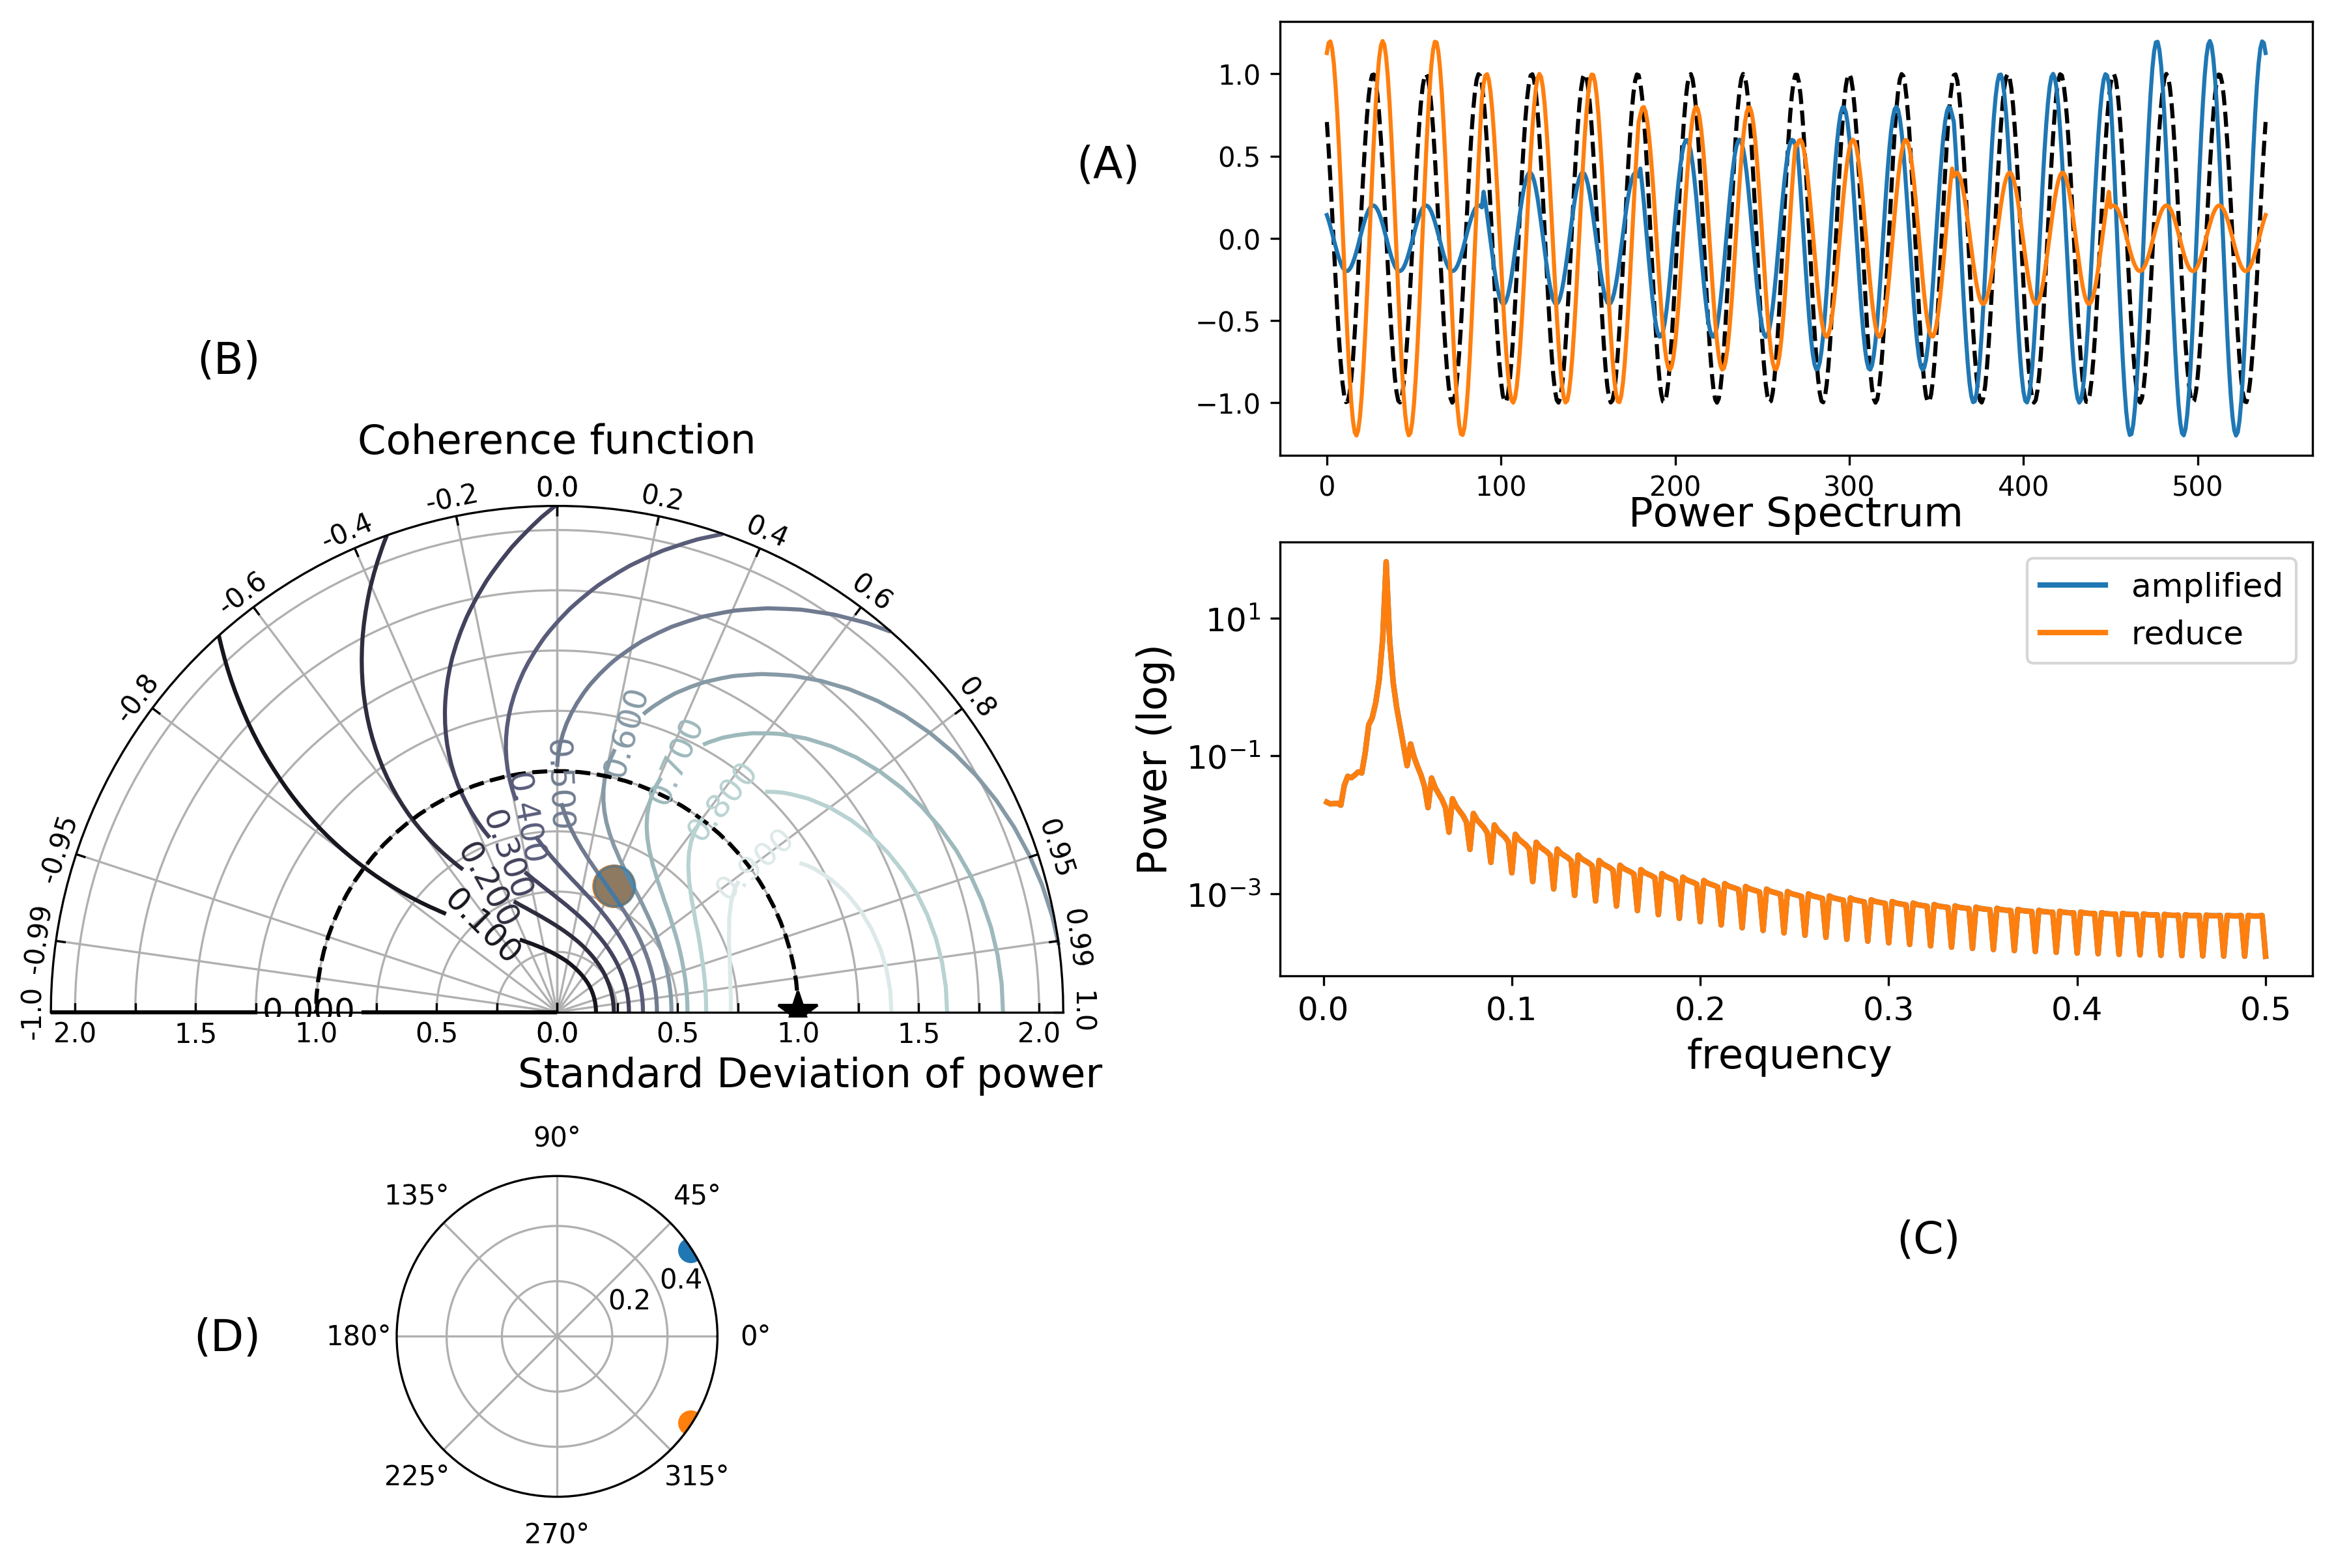

In [8]:
f = 17.783/540.
series_names =['OBS','amplified','reduce'] 
Spectral_diagram(series,series_names,f,'power')

*  PHASE

In [121]:
def Spectral_diagram(series,s_name,f,var):
    """ Taylor Diagram : obs is reference data sample
        in a full diagram (0 --> npi)
        --------------------------------------------------------------------------
        Input: ref_phi - freq of reference  -- > lead to a phase reference
               cohere  - raw of coherence for test (call def cohere)
               phi     - raw of phases for test    (call def cohere)
               
    """
    import numpy as np
    from numpy import ma
    import mpl_toolkits.axisartist.grid_finder as GF
    import mpl_toolkits.axisartist.floating_axes as FA
    import matplotlib.pyplot as plt
    import statistics
    
    #f_ref = np.abs(f - series[0]['period'][:]).argmin() 
    
    coerdata,coer,std ={},{},{}
    #coerdata2 ={}
    amp,fi = {},{}
    
    for i in series.keys():
        series[i]   = hstack(series[i]) #make sure stack arrays in sequence horizontally (column wise)
        coerdata[i] = coherence(series[i],series[0])
        f_ref       = np.abs(coerdata[0]['f'][:] - f).argmin()   
        n           = len(coerdata[i]['sxx'])
        std[i]      = np.sqrt(1.0/n * pow((coerdata[i]['sxx'][f_ref] -np.mean(coerdata[i]['sxx'])),2))
        coer[i]     = coerdata[i]['coer'][f_ref].real
        amp[i]      = coerdata[i]['amp'][f_ref].real
        fi[i]       = coerdata[i]['fi'][f_ref].real
     
    ref = 1 #1
    #mean values to be R0
    numbers = [coer[key] for key in coer]
    MED = statistics.mean(numbers)
    MAX = np.max(numbers)
    
    rlocs = around(np.concatenate((np.arange(0,-10,-0.2),[-0.95,-0.99],np.arange(0,10,0.2),[0.95,0.99])),2)
    str_rlocs = np.concatenate((np.arange(0,10,0.2),[0.95,0.99],np.arange(0,10,0.2),[0.95,0.99]))
    tlocs = np.arccos(rlocs)        # Conversion to polar angles
    gl1 = GF.FixedLocator(tlocs)    # Positions
    tf1 = GF.DictFormatter(dict(zip(tlocs, map(str,rlocs))))
    

    str_locs2 = np.arange(-10,11,0.5)
    #rlocs2 = np.concatenate((np.arange(10)/10.,[0.95,0.99]))
    #rlocs2 = np.arange(-10,11,1)
    tlocs2 =  np.arange(-10,11,0.5)      # Conversion to polar angles
       
    g22 = GF.FixedLocator(tlocs2)  
    tf2 = GF.DictFormatter(dict(zip(tlocs2, map(str,str_locs2))))

    
    
    
    tr = PolarAxes.PolarTransform()
    
    smin = 0
    smax =2.1 

    ghelper = FA.GridHelperCurveLinear(tr,
                                           extremes=(0,np.pi, # 1st quadrant  np.pi/2
                                                     smin,smax),
                                           grid_locator1=gl1,
                                           #grid_locator2=g11,
                                           tick_formatter1=tf1,
                                           tick_formatter2=tf2,
                                           )
    fig = plt.figure(figsize=(15,10), dpi=300)
    ax = FA.FloatingSubplot(fig, 121, grid_helper=ghelper)

    fig.add_subplot(ax)
    ax.axis["top"].set_axis_direction("bottom") 
    ax.axis["top"].toggle(ticklabels=True, label=True)
    ax.axis["top"].major_ticklabels.set_axis_direction("top")
    ax.axis["top"].label.set_axis_direction("top")
    ax.axis["top"].label.set_text("Coherence function")
    ax.axis["top"].label.set_fontsize(15)
    
    ax.axis["left"].set_axis_direction("bottom") 
    ax.axis["left"].label.set_text("Standard Deviation of power")
    ax.axis["left"].label.set_fontsize(15)
    
    ax.axis["right"].set_axis_direction("top") 
    ax.axis["right"].toggle(ticklabels=True, label=True)
    ax.axis["right"].set_visible(True)
    ax.axis["right"].major_ticklabels.set_axis_direction("bottom")
   

    ax.axis["bottom"].set_visible(False) 

    ax.grid(True)

    ax = ax.get_aux_axes(tr)

    t = np.linspace(0, np.pi)
    r = np.zeros_like(t) + ref
    
    ax.plot(t,r, 'k--', label='_')


    rs,ts = np.meshgrid(np.linspace(smin,smax),
                            np.linspace(0,np.pi))

    
    #rms = np.sqrt(ref**2 + rs**2 - 2*ref*rs*np.cos(ts))
    #rms = (4*(1+np.cos(ts))**4/((rs+1/rs)**2 *(1+MAX)**4))#/std[0]
    rms = (4*(1+np.cos(ts))/((rs+1/rs)**2 *(1+MAX)))#/std[0]
    
    #rms = 1 *e**(-(ref-ts)*np.pi/180)
    CS =ax.contour(ts, rs,rms,[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],cmap = cm.bone)
    plt.clabel(CS, inline=1, fontsize=12)
    

    ax.plot(np.arccos(0.999999),ref,'k',marker='*',ls='', ms=15)
    aux = range(1,len(series.keys()))
    #del aux[ref]
    
        
    cd = ['blue','blue','blue','red', 'red','g','g']
    m = ['o','o','o','o','o']*10
    alf = [1,0.5,1,0.5,1,]*10
    rmse =[]
    for i in aux:
        std[i]=std[i]/std[0]
        ax.plot(np.arccos(coer[i]),std[i],marker=m[i],ms=15,alpha=alf[i],label='%s'%s_name[i])
        #rmse = np.sqrt (round((1**2 + (std[i])**2 - 2*1*(std[i])*coer[i]),3))
        skill = 4*(1+(coer[i]))/((std[i]+1/std[i])**2 *(1+MAX))
        
        #x = [np.arccos(coer[1]),np.arccos(coer[2])]
        #y = [std[1]/std[0],std[2]/std[0]]
        #ax.plot(x,y,'blue', linewidth = 0.3, alpha=0.7)
        
        #x = [np.arccos(coer[3]),np.arccos(coer[4])]
        #y = [std[3]/std[0],std[4]/std[0]]
        #ax.plot(x,y,'red', linewidth = 0.3, alpha=0.7)
        print ('name','cohere','STD/STD[0]','SKILL')
        print (s_name[i],coer [i], std[i], skill)
        print ('freq= %s'%f_ref)
        #print rs
        
    #legend(bbox_to_anchor=(1.1, 1),prop=dict(size='large'),loc='best')
    # -- explain -- Fig 3
    #plt.axhspan(-0.1, 0.2, facecolor='0.5', alpha=0.2)
    t1 = np.linspace(0,2)
    tx = np.linspace(0, np.pi/10)
    t2 =  np.zeros_like(tx) + 2.1
    #ax.fill_between(tx,t2,color='b',facecolor='0.3', alpha=0.2)
    font = {'size'   : 12}
    #plt.text(0.6, 0.4, '$amplitude$',color='b',fontdict=font,rotation=10)
    #r1 = np.zeros_like(t) + 0.75
    #r2 = np.zeros_like(t) + ref+0.25
    #ax.fill_between(t, r1, r2,color ='r',facecolor='0.3', alpha=0.2)
    #plt.text(-0.46, 1.1, '$phase$',color='r',fontdict=font, rotation=0)
 
    # --- polar ---
        
    ax = fig.add_subplot(427, projection='polar')
    #r = [1,1,1]
    #theta = [np.pi/2,np.pi/4,np.pi]
    #area = [100,100,100]
    #colors = theta
    #c = ax.scatter(theta, r,s=area, cmap='hsv', alpha=0.75)
    scale_factor=100
    for i in aux:
        
        ax.scatter(fi[i], std[i],s=amp[i]*scale_factor, cmap='hsv', alpha=1)
        print(fi[i],amp[i])
    
    # ---  time series  --- 
    ax = plt.subplot(3,2,2)
    ax.plot(series[0], 'k--')
    for i in aux:
        ax.plot(series[i])    
    # --- power spectrum  --
    cl = ['black','b:', 'b', 'r:','r','g:','g']
        
    line = [0.5,2,2,2,2,2]
    alfa = [0.5,1,1,1,1,1]
    
    ax = plt.subplot(3,2,4)
    #ax = plt.subplot(4,2,6)
    for i in aux:  

            ax.plot(coerdata[i]['f'][:],coerdata[i]['sxx'][:],alpha=alfa[i],label='%s'%s_name[i], linewidth =line[i] )

            ax.tick_params(axis='both', which='major', labelsize=12)
            ax.set_yscale('log')
            #ax.set_xscale('log')
            xlabel('frequency ',fontsize=15)
            ylabel('Power (log)',fontsize=15)
            ax.set_title('Power Spectrum',fontsize=15)
            
            
            

    legend(bbox_to_anchor=(1, 1),prop=dict(size='large'),loc='best')   
    
    #plt.tight_layout()
    # -- STD vs TD -- Fig4
    fig.text (.5, .8,"(A)",horizontalalignment='right',fontsize=16)
    fig.text (.2, .7,"(B)",horizontalalignment='right',fontsize=16)
    fig.text (.78, .25,"(C)",horizontalalignment='right',fontsize=16)  
    fig.text (.2, .2,"(D)",horizontalalignment='right',fontsize=16)
    plt.savefig('figs/non_phase_explain.png',bbox_inches='tight')
    #fig.text (.5, .95,"SPECTRAL Taylor Diagram",horizontalalignment='center',fontsize=16)
    pylab.show()
    return


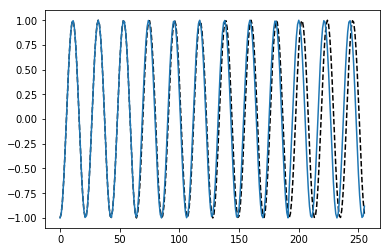

In [122]:
obs,y1,y2,y3,y4 = 0,0,0,0,0
n = np.arange(0,256)
n1 = np.arange(0,64)
N = n.shape[0]
k1 =12


fase1 = np.pi
fase2 = np.pi+ np.pi/24 
fase3 = np.pi + np.pi/12 #180
fase4 = np.pi + np.pi/4
fase5 = 2*np.pi

amp1 =1.0


obs = amp1* cos((2*np.pi*k1*n/N)+(fase1)) #+np.random.normal(0,1,N)
y1 =  amp1 * cos((2*np.pi*k1*n1/N)+(fase1))#+np.random.normal(0,1,N)
y2 =  amp1 * cos((2*np.pi*k1*n1/N)+(fase2))
y3 =  amp1 * cos((2*np.pi*k1*n1/N)+(fase3))
y4 =  amp1 * cos((2*np.pi*k1*n1/N)+(fase4))
#y5 =  amp1 * cos((2*np.pi*k1*n/N)+(fase5))

t1 = np.concatenate((y1,y2),axis=0)
t2 = np.concatenate((t1,y3),axis=0)
t3 = np.concatenate((t2,y4),axis=0)


series = {}
series[0] = obs
series[1] = t3
#series[2] = y2
#series[3] = y3
#series[4] = y4
#series[5] = y5
plot(obs,'k--')
plot(t3)
#plot(y2)
#plot(y3)
#plot(y4)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in arccos
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:109: RuntimeWarning: divide by zero encountered in true_divide


name cohere STD/STD[0] SKILL
non-stationary phase 0.8356585714405543 0.9137387180219101 0.9104003691424258
freq= 116
0.29073279683808584 0.9562492532218594


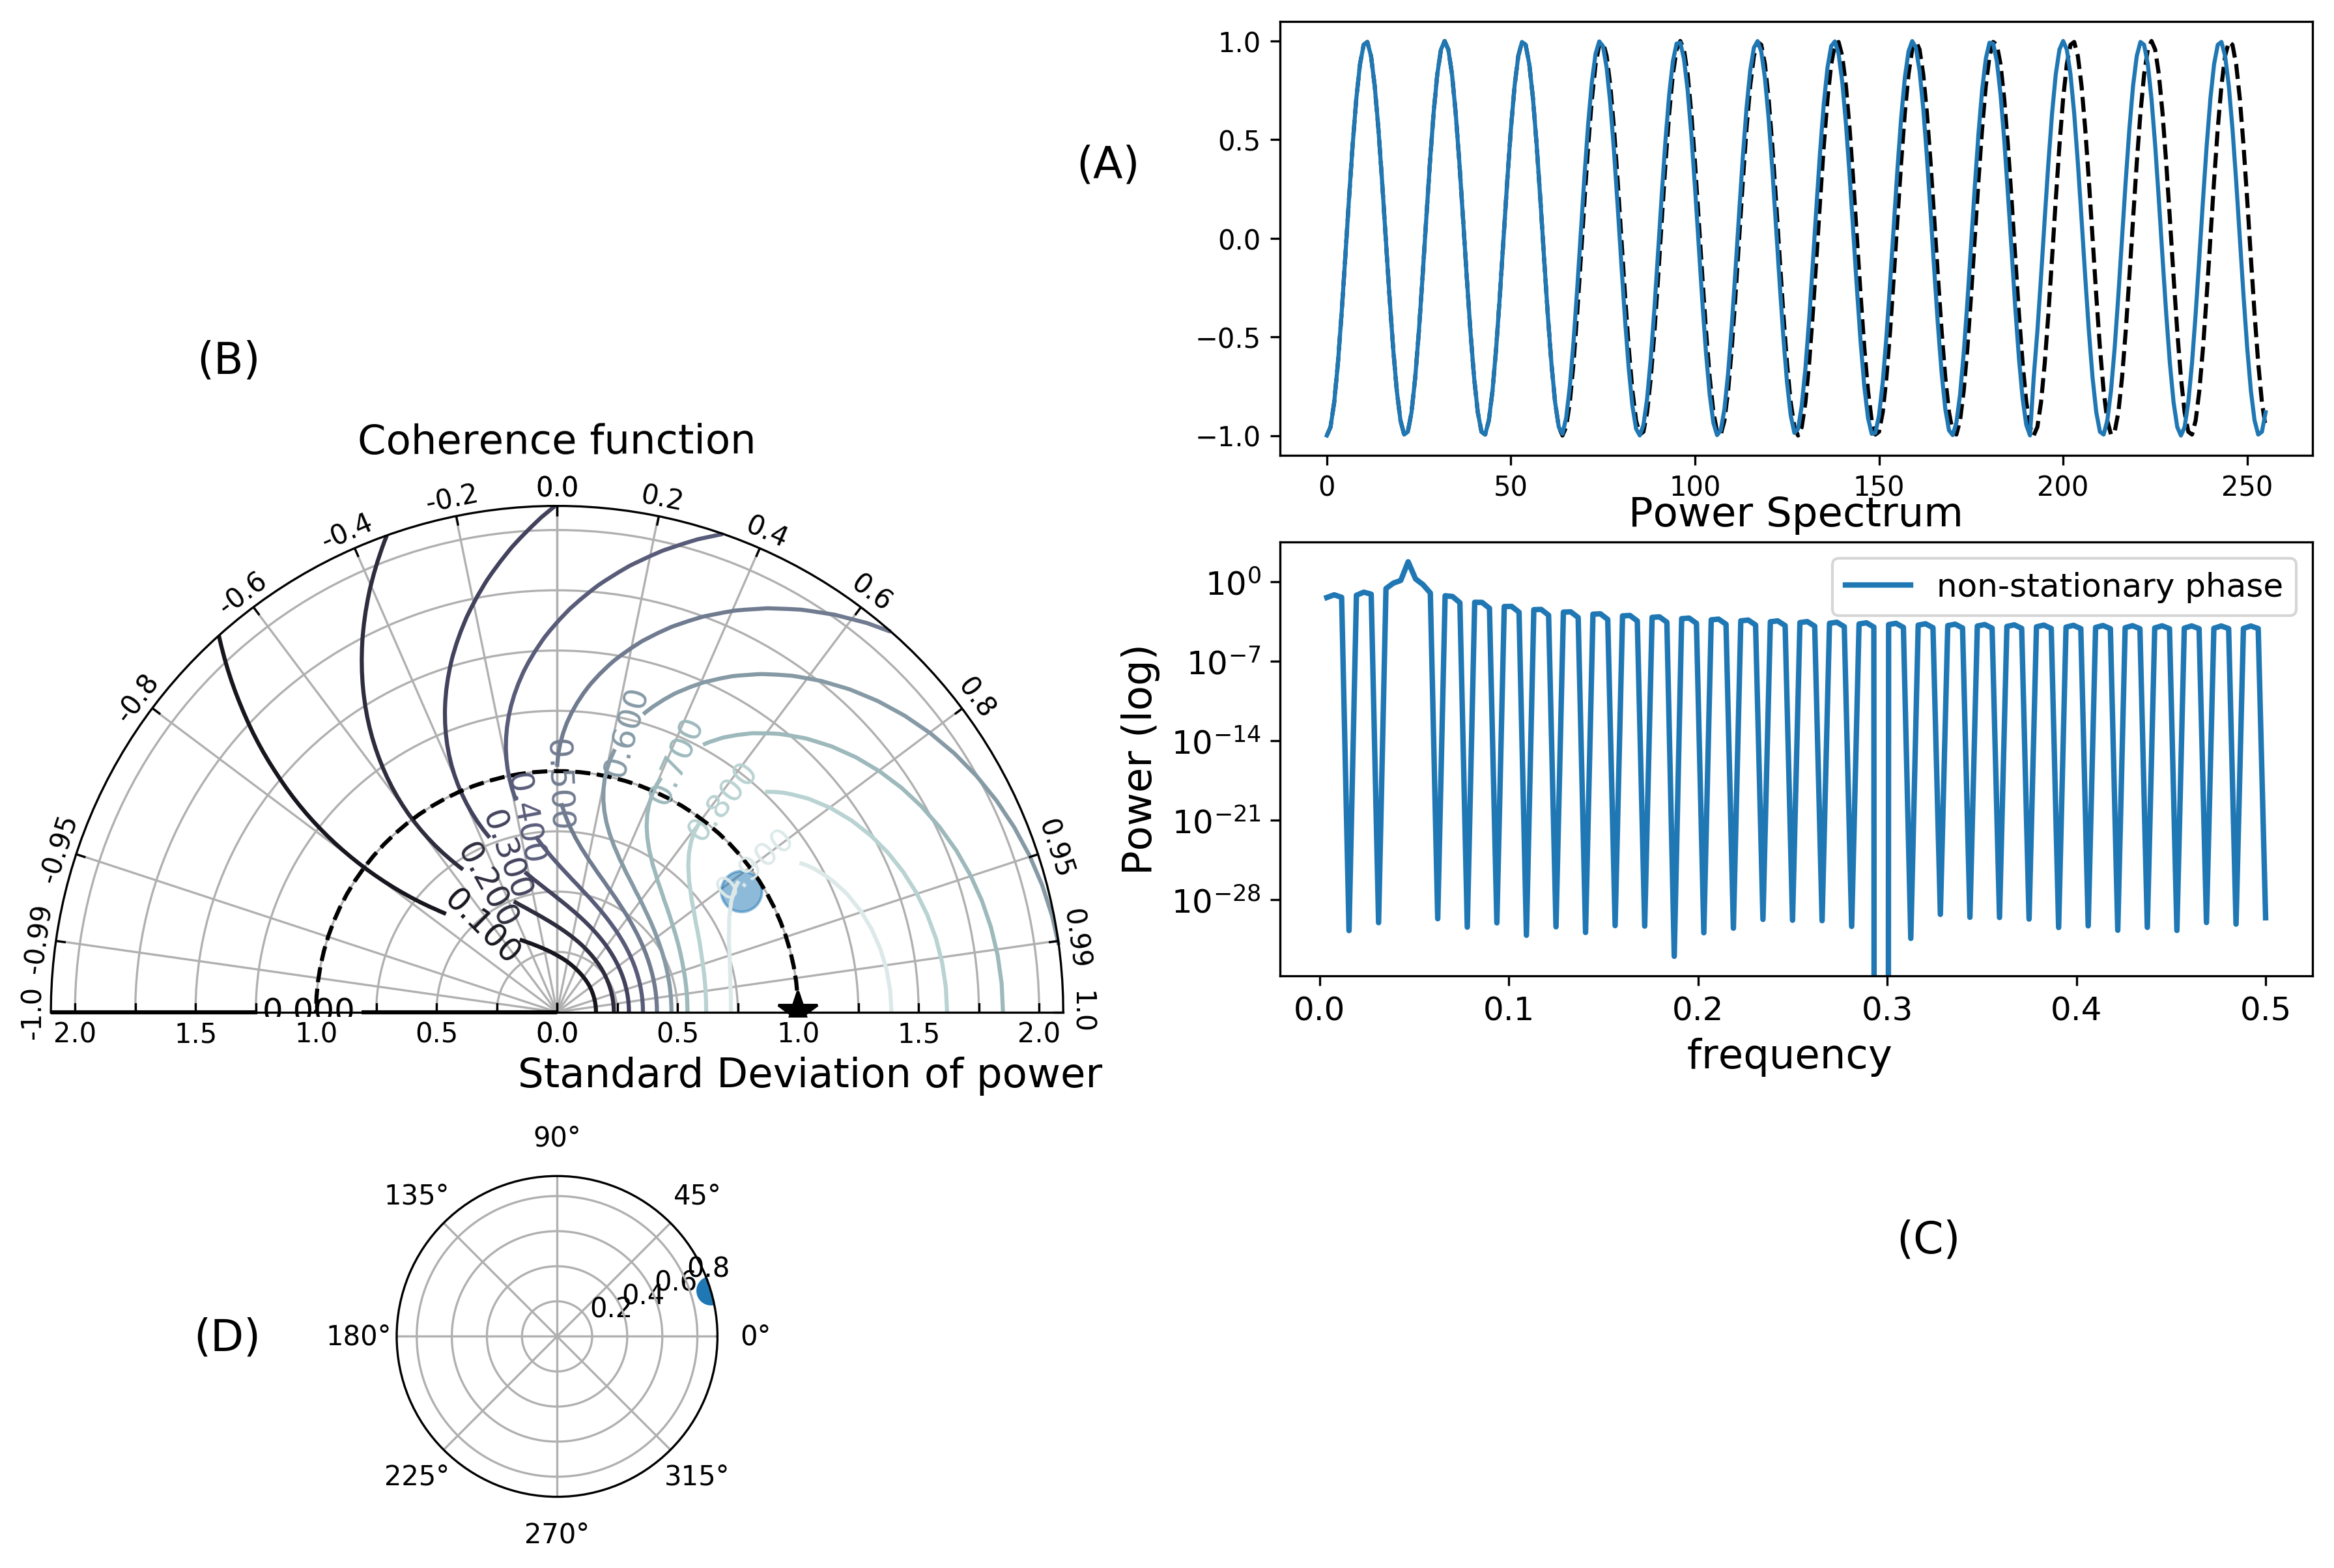

In [123]:
f = 12/256.
series_names =['OBS','non-stationary phase']    
Spectral_diagram(series,series_names,f,'power')